<a id="1.2"></a>
    
# **Cars 4 You: Expediting Car Evaluations with ML <font>**

# Group 66

**Daniel de Amorim Rocha** (20221895)  
**Guilherme Tavares da Silva** (20221910)  
**Maria Silvestre de Carvalho** (20221953)  

## GitHub Repository
[Repository link text](https://github.com/guilhermetnsilva/group66-cars4you-regression)

## Group contribution

**Daniel de Amorim Rocha:** Focused mainly on the open-ended component and analytical storytelling. Developed and iterated on visualizations for EDA and model understanding, extracted key insights from patterns in the data, and supported interpretation of results (relationships, trends, and feature behaviour). Contributed ideas for the “deployment” angle and helped validate that outputs made sense from a user-facing perspective.

**Guilherme Tavares da Silva:** Led the project integration and reproducibility side. Set up and maintained the GitHub repository structure and ensured all files ran coherently with correct relative paths and dependencies. Implemented the core feature engineering and part of the data preprocessing, handled the modeling workflow (training, tuning/experiments, selection), and ensured the pipeline components worked end-to-end (src modules, saved bundle, submissions, and interdependent file dynamics).

**Maria Silvestre de Carvalho:** Focused on evaluation rigor and code quality. Implemented the cross-validation utilities and supported the definition of the evaluation procedure/metrics. Contributed strongly to refactoring and readability, including documenting and commenting significant portions of the codebase to improve clarity and maintainability.   

**Overall statement:** The workload was distributed evenly across complementary areas: Daniel drove insights and visualization, Guilherme ensured the full system ran reliably and handled modeling/engineering, and Maria strengthened evaluation and code clarity. We collaborated continuously, reviewed each other’s work, and aligned decisions as a group.

**Final split:**  
- Daniel de Amorim Rocha: 33% 
- Guilherme Tavares da Silva: 33%
- Maria Silvestre de Carvalho: 33% 



## Table of Contents

- [1. Importing the datasets and libraries](#1-importing-the-datasets-and-libraries)
- [2. EDA & Data cleaning](#2-eda--data-cleaning)
  - [2.1. Descriptive statistics](#21-descriptive-statistics)
  - [2.2. Data cleaning](#22-data-cleaning)
    - [2.2.1. Numerical inconsistencies](#221-numerical-inconsistencies)
    - [2.2.2. Categorical inconsistencies](#222-categorical-inconsistencies)
    - [2.2.3. Duplicates](#223-duplicates)
    - [2.2.4. Missing values](#224-missing-values)
  - [2.3. Data visualization](#23-data-visualization)
    - [2.3.1. Univariate exploration](#231-univariate-exploration)
    - [2.3.2. Multidimensional exploration](#232-multidimensional-exploration)
- [3. Feature Engineering](#3-feature-engineering)
- [4. Split using K-fold Cross-Validation](#4-split-using-k-fold-cross-validation)
- [5. Model Benchmarking](#5-model-benchmarking)
  - [5.1. Common baseline pipeline](#51-common-baseline-pipeline)
  - [5.2. Benchmark](#52-benchmark)
- [6. Model Optimization](#6-model-optimization)
  - [6.1. Feature selection strategies](#61-feature-selection-strategies)
  - [6.2. Random search](#62-random-search)
    - [6.2.1. HistGBR](#621-histgbr)
    - [6.2.2. GBR](#622-gbr)
    - [6.2.3. Random Forest](#623-random-forest)
- [7. Final Model & Kaggle submission](#7-final-model--kaggle-submission)
- [8. Feature Importances](#8-feature-importances)


## Abstract
This project addresses the problem of predicting used car prices for the Cars4you online marketplace, where accurate and consistent pricing supports user trust and platform revenue. Using a 2020 dataset containing vehicle characteristics (brand, model, engine size, transmission), usage indicators (mileage) and fuel-related variables, our goal was to build a regression model that is accurate, robust, interpretable, and deployable.

We began with exploratory data analysis and data cleaning to resolve inconsistencies and standardize categorical values (brand/model normalization, fuel type and transmission categories), while handling duplicates and missingness. We engineered additional predictors such as car age and usage intensity metrics, and applied log transformations to stabilize highly skewed variables, including modelling the target on a log-price scale. To avoid data leakage, all preprocessing steps (encoding, winsorization/clipping of extreme values, imputation, scaling and feature selection) were learned inside a custom K-fold cross-validation pipeline.

We benchmarked multiple model families (linear models, KNN, decision trees, bagging/boosting ensembles and neural networks) using MAE as the primary metric and R² as a complementary metric. Boosting models consistently outperformed alternatives. After random-search optimization and a consistent feature selection choice (SelectKBest with mutual information, k=23), we selected **Gradient Boosting Regressor (GBR) as the final model**, achieving a cross-validated **validation MAE of 1326 GBP with validation R² of 0.946**, and only a small generalization penalty relative to the closest contender (HistGBR). Feature importance and SHAP analyses confirmed that key drivers are economically plausible (notably car age, transmission, engine size and mileage). Finally, we implemented a Streamlit interface enabling users to simulate new listings and obtain model-based pricing suggestions.

## I. Identifying Business Needs

Cars4you is an online marketplace for used cars, where pricing decisions directly affect both conversion rates and the perceived fairness of the platform. If similar vehicles are listed at very different prices, sellers may lose trust in the system and buyers may either overpay or defect to competitors. At the same time, manual pricing does not scale well when thousands of listings are created every day.

The goal of this project is to build a data-driven pricing model that can suggest realistic market prices for new listings, given information about the car (brand, model, age, mileage, fuel type, etc.). From a business perspective, the model should (i) reduce obvious under- and over-pricing, (ii) be stable enough to generalise to new cars, and (iii) be interpretable enough for product and business teams to understand why a given price is suggested.

From a technical perspective, we frame the problem as a supervised regression task on tabular data. All preprocessing steps (cleaning, encoding, winsorization, feature engineering, scaling and feature selection) are implemented inside a custom cross-validation pipeline to avoid data leakage. Model assessment is based on K-fold cross-validation with 3 folds on the training data, using MAE as the main performance metric (R² as complementary diagnostics). The held-out Kaggle test set is used only once at the end, to generate the final CSV submission with our best model.

<a id="1.1"></a>
    
# **Metadata <font>**

| **Attribute**      | **Description** |
|--------------------|-----------------|
| `carID`            | An attribute that contains an identifier for each car. |
| `Brand`            | The car’s main brand (e.g., Ford, Toyota). |
| `model`            | The car model. |
| `year`             | The year of registration of the car. |
| `mileage`          | The total reported distance travelled by the car (in miles). |
| `tax`              | The amount of road tax (in £) that, in 2020, was applicable to the car in question. |
| `fuelType`         | Type of fuel used by the car (Diesel, Petrol, Hybrid, Electric). |
| `mpg`              | Average Miles per Gallon. |
| `engineSize`       | Size of engine in liters (cubic decimeters). |
| `paintQuality%`    | Mechanic’s assessment of overall paint quality and hull integrity (filled during evaluation). |
| `previousOwners`   | Number of previous registered owners of the vehicle. |
| `hasDamage`        | Boolean marker filled by the seller at registration stating whether the car is damaged or not. |
| `price` *(train only)* | The car’s price when purchased by Cars 4 You (in £). |

<a id="1.1"></a>
    
# **1. Importing datasets and libraries <font>**

This section, as mentioned in the title, is intended for importing the data and necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import random

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# fuzzy matching for category correction
from thefuzz import process, fuzz

# set up of cross validation functions
from sklearn.base import clone
from collections import Counter

# model selection
from sklearn.model_selection import KFold

# scaling
from sklearn.preprocessing import RobustScaler

# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_regression, SelectFromModel, RFE

# models to try
from sklearn.linear_model import Ridge, HuberRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# to export the model and 8. Feature Importance
import joblib

import shap

# Make the project root importable so that we can do `from src...`
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from src.data_loading import load_raw_data
from src.modeling import run_model, transform_X, evaluate_model, avg_scores, predict_on_test


In [2]:
train_data, test_data = load_raw_data()

<a id="1"></a>

# **2. EDA & Data cleaning <font>**

### II.1. Data overview and key insights

We started by exploring the raw training and test set provided by Cars4you, which contains one row per car listing and a mix of numerical and categorical features. The core numerical variables include the advertised price, mileage, engine size, fuel efficiency (mpg) and annual tax, while the main categorical variables capture brand, model, fuel type and transmission, together with registration year and previous owners. Additionally, it is to note that paintQuality% should be excluded from the dataset, as it depends on the mechanics assessment.

The initial exploration highlighted several issues that have a direct impact on modelling:

- **Heavy skewness and outliers** in price, mileage, tax and mpg, with a long right tail of very expensive or extreme cars.
- **Strong non-linear patterns** between price and continuous features such as mileage and age, suggesting that simple linear models would struggle without transformations.
- **High-cardinality categorical variables**, especially `Brand` and `model`, with many near-duplicate or noisy categories (typos, inconsistent capitalisation, truncated names).
- **Missing values** scattered across both numerical and categorical features, and a small number of clearly problematic text entries (e.g. placeholder strings instead of real values).

These patterns motivated the preprocessing pipeline described next, which was designed to make the data more homogeneous, reduce the influence of extreme values and expose more meaningful signals to the models, while keeping everything compatible with cross-validation.

In [3]:
display(train_data.info())
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           31918 non-null  object 
 2   model           31917 non-null  object 
 3   year            31914 non-null  float64
 4   transmission    31944 non-null  object 
 5   mileage         31878 non-null  float64
 6   fuelType        31911 non-null  object 
 7   tax             29259 non-null  float64
 8   mpg             29279 non-null  float64
 9   engineSize      31939 non-null  float64
 10  paintQuality%   31942 non-null  float64
 11  previousOwners  31970 non-null  float64
 12  hasDamage       31970 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


None

The training dataset has 75973 cars and the test has 32 566.

In [4]:
train_data.shape

(75973, 14)

In [5]:
display(train_data.head())

carID   Brand      model    year  price transmission  mileage fuelType  \
0  69512      VW       Golf  2016.0  22290    Semi-Auto  28421.0   Petrol   
1  53000  Toyota      Yaris  2019.0  13790       Manual   4589.0   Petrol   
2   6366    Audi         Q2  2019.0  24990    Semi-Auto   3624.0   Petrol   
3  29021    Ford     FIESTA  2018.0  12500        anual   9102.0   Petrol   
4  10062     BMW   2 Series  2019.0  22995       Manual   1000.0   Petrol   

     tax        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
0    NaN  11.417268         2.0           63.0        4.000000        0.0  
1  145.0  47.900000         1.5           50.0        1.000000        0.0  
2  145.0  40.900000         1.5           56.0        4.000000        0.0  
3  145.0  65.700000         1.0           50.0       -2.340306        0.0  
4  145.0  42.800000         1.5           97.0        3.000000        0.0

In [6]:
train_data.tail(10)

carID     Brand         model    year  price transmission  mileage  \
75963  67221        VW         T-Roc  2020.0  25785    Semi-Auto     10.0   
75964  41090  Mercedes     GLC Class  2016.0  24486          NaN  22955.0   
75965  16023      Ford      EcoSport  2017.0  10498       Manual  13613.0   
75966  60263      Opel   Crossland X  2018.0  13995       Manual   1800.0   
75967  44131  Mercedes     GLC Class  2018.0  30495    Semi-Auto  11943.0   
75968  37194  Mercedes       C Class  2015.0  13498       Manual  14480.0   
75969   6265      Audi            Q3  2013.0  12495    Semi-Auto  52134.0   
75970  54886    Toyota          Aygo  2017.0   8399    Automatic  11304.0   
75971    860      Audi            Q3  2015.0  12990       Manual  69072.0   
75972  15795      Ford        Fiesta  2018.0  10495       Manual  16709.0   

      fuelType    tax       mpg  engineSize  paintQuality%  previousOwners  \
75963   Petrol  145.0  39.80000         1.5           65.0             4.0   
75964   Diesel  125.0  56.50000         2.1           72.0             4.0   
75965   Petrol  125.0  88.32164         1.0           57.0             3.0   
75966   Petrol  150.0  57.70000         1.2           69.0             0.0   
75967   Diesel  150.0  56.50000         2.1           74.0             NaN   
75968    etrol  125.0  53.30000         2.0           78.0             0.0   
75969   Diesel  200.0  47.90000         2.0           38.0             2.0   
75970   Petrol  145.0  67.00000         1.0           57.0             3.0   
75971    iesel  125.0  60.10000         2.0           74.0             2.0   
75972    Petro  145.0  64.20000         1.1           38.0             1.0   

       hasDamage  
75963        0.0  
75964        0.0  
75965        0.0  
75966        0.0  
75967        0.0  
75968        0.0  
75969        0.0  
75970        0.0  
75971        0.0  
75972        0.0

<a id="1"></a>

## **2.1. Descriptive statistics <font>**

Computing the descriptive statistics for the numerical variables.

* The maximun of `year` is 2024.1217, which signals 2 problems: i) it should be an integer with no decimal part, and ii) there should be no cars dated after 2020, as this is a dataset of cars until that year;
* `hasDamage` is always 0.0 in the training data;
* `mileage`, `tax`, `mpg`, `engineSize` and `previousOwners` have a negative minimum;
* `paintQuality%`should be excluded from the dataset.

In [7]:
train_data.describe().T

count          mean           std           min       25%  \
carID           75973.0  37986.000000  21931.660338      0.000000  18993.00   
year            74482.0   2017.096611      2.208704   1970.000000   2016.00   
price           75973.0  16881.889553   9736.926322    450.000000  10200.00   
mileage         74510.0  23004.184088  22129.788366 -58540.574478   7423.25   
tax             68069.0    120.329078     65.521176    -91.121630    125.00   
mpg             68047.0     55.152666     16.497837    -43.421768     46.30   
engineSize      74457.0      1.660136      0.573462     -0.103493      1.20   
paintQuality%   74449.0     64.590667     21.021065      1.638913     47.00   
previousOwners  74423.0      1.994580      1.472981     -2.345650      1.00   
hasDamage       74425.0      0.000000      0.000000      0.000000      0.00   

                    50%      75%            max  
carID           37986.0  56979.0   75972.000000  
year             2017.0   2019.0    2024.121759  
price           14699.0  20950.0  159999.000000  
mileage         17300.0  32427.5  323000.000000  
tax               145.0    145.0     580.000000  
mpg                54.3     62.8     470.800000  
engineSize          1.6      2.0       6.600000  
paintQuality%      65.0     82.0     125.594308  
previousOwners      2.0      3.0       6.258371  
hasDamage           0.0      0.0       0.000000

* `Brand` has 72 unique values, `model` has 735, which might be real numbers, meaning that if these are all real brands and models, the dataset has a huge diversity of vehicles.
* However, `transmission` and `fuelType` have very high cardinality (40 and 34 respectively). It seems unrealistic to exist 40 different types of transmission.

There's a need to further explore the unique values of these categorical features, because there's a high probability of having misspelled or inconsistent categories:

In [8]:
train_data.describe(include='O').T

count unique     top   freq
Brand         74452     72    Ford  14808
model         74456    735   Focus   6353
transmission  74451     40  Manual  38050
fuelType      74462     34  Petrol  37995

In [9]:
train_data['hasDamage'].value_counts()

hasDamage
0.0    74425
Name: count, dtype: int64

## 2.2. Data cleaning

We need to create a copy before performing any transformations, to preserve the original version. It is important to note that the preprocessing we are applying here, to remove the inconsistencies, is being applied to both train and test data. We are only applying deterministic changes at this point, to prevent data leakage.

In [10]:
train = train_data.copy()
test = test_data.copy()

The following variables that should be excluded from the dataset:
* `hasDamage` only takes the value 0.0 in the train/validation data; it has no relevant information to predict price, therefore it will be removed;
* `paintQuality%` should also be removed, because results from the mechanic's assessment of the overall paint quality. Our model is meant to do predictions based on the user's input, without the mechanic's input on the car's characteristics.

In [11]:
train = train.drop(columns=['hasDamage', 'paintQuality%'], axis = 1)
test = test.drop(columns=['hasDamage', 'paintQuality%'], axis=1)

### 2.1.1. Numerical inconsistencies

**Inconsistencies**

The following list summarizes the inconsisties we searched for and identified, involving the numerical features:
*  **Engine size set to zero** when the car is **not eletric** (note that, even though the categories for `fuelType` are all misspelled, the electric one is the only intact, so we can filter it in this way): assuming these are note real zeros, we will treat them as missing values to impute later (set them to NaN).
* **Non zero miles per gallon for eletric cars**: in these cases, we will **set mpg to zero**.
* Cars with over 200 miles per gallon: after some research on the regular/usual values for consumption in miles per gallon, we consider all values higher than 200 mpg an error that needs to be corrected. 200 miles per gallon is extremely high for almost any regular car. Therefore we will convert them to **Nan** to later be imputed.
* **Year as a float**: We are going to correct this by **rounding year to the closest integer**.
* Years after 2020:  cars 4 you has provided this data from an older version of the database, from 2020. Therefore, all values after 2020 don't make sense. We assume this was an error and in reality these cars are older than that: we will set them to **Nan** and impute them later.
* negative values in `mileage`, `tax`, `mpg`, `engineSize`, `previousOwners`: this must be an error in data collection, therefore will be replaced by **Nan**.
* **cars before 1970**: there's only 2 cars - Opel Zafira (only was produced starting on 1999) and Mercedes M class (ran from 1998 through 2015); therefore 1970 might be a data collection error as it doesn't correspond to the true year. We will set to NaN to impute later as well.

In [12]:
train[(train['engineSize']==0)& (train['fuelType'] != "Electric")]

carID    Brand      model    year  price transmission  mileage  \
64     30317     Ford        NaN  2019.0   9999       Manual  10000.0   
759    21935     Ford         KA  2018.0   8444       Manual  17000.0   
1039    9518      BMW   2 Series  2015.0  14700    Automatic  32882.0   
1057   32528  Hyundai     Tucson  2016.0  13800       Manual  27311.0   
1519   33804  Hyundai     Tucson  2019.0  15000       Manual  22397.0   
...      ...      ...        ...     ...    ...          ...      ...   
74469  26630     Ford     Fiesta  2018.0  11463          NaN  18000.0   
75168  20128     Ford      Focus  2018.0  18389       Manual  19000.0   
75401  47605    Skoda      Fabia  2018.0  11500       Manual  10720.0   
75405  33307  Hyundai        I10  2018.0   8500       Manual  12948.0   
75940   3890     Audi         Q2  2020.0  24888    Automatic   1500.0   

      fuelType    tax   mpg  engineSize  previousOwners  
64      Petrol  145.0  47.9         0.0             3.0  
759     Petrol  145.0  57.7         0.0             0.0  
1039    Diesel  125.0  60.1         0.0             0.0  
1057    Diesel   30.0  61.7         0.0             1.0  
1519    Petrol  150.0  34.9         0.0             2.0  
...        ...    ...   ...         ...             ...  
74469    Petro  145.0  65.7         0.0             0.0  
75168   Petrol    NaN   NaN         0.0             2.0  
75401   Petrol  150.0  64.2         0.0             4.0  
75405   Petrol  145.0  60.1         0.0             2.0  
75940   Petrol  145.0  42.2         0.0             3.0  

[180 rows x 12 columns]

In [13]:
train.loc[(train['engineSize']==0)& (train['fuelType'] != "Electric"), "engineSize"] = np.nan
test.loc[(test['engineSize']==0)& (test['fuelType'] != "Electric"), "engineSize"] = np.nan

In [14]:
train[(train['mpg'] != 0) & (train['fuelType'] == "Electric")]

carID Brand    model    year  price transmission  mileage  fuelType  \
6978   12786   NaN       i3  2015.0  17400    Automatic  29465.0  Electric   
37023  64169  Opel   Ampera  2015.0  12999    Automatic  34461.0  Electric   
52274  21931  Ford   Mondeo     NaN  15500    Automatic  24531.0  Electric   
52579  16306  Ford   Mondeo  2016.0  15975    automatic   9396.0  Electric   

       tax    mpg  engineSize  previousOwners  
6978   0.0  470.8    3.822758             2.0  
37023  0.0  235.4    1.400000             1.0  
52274  0.0   67.3    2.000000             4.0  
52579  0.0   67.3    2.000000             3.0

In [15]:
train.loc[(train['mpg'] != 0) & (train['fuelType'] == "Electric"), 'mpg'] = 0
test.loc[(test['mpg'] != 0)& (test['fuelType'] == "Electric"), 'mpg'] = 0

In [16]:
train[(train['mpg'] > 200)]

carID     Brand     model    year  price transmission       mileage  \
552    53577    Toyota     PRIUS  2018.0  19072    Automatic  43584.000000   
4101   13075       BMW        i3  2015.0  15498    Automatic  33931.000000   
4191   31699   Hyundai     Ioniq  2018.0  18970    Automatic  14886.000000   
4935   44875  Mercedes   C Class  2020.0  40999    Automatic    400.000000   
5278   12640       BMW        i3  2017.0  19500    Automatic  23956.000000   
7904   55563    Toyota     Prius  2019.0  28590     Automati   5000.000000   
10158  48968     Skoda    Superb  2020.0  29995    Semi-Auto     15.000000   
17247  50564     Skoda    Superb  2020.0  28332    Semi-Auto   5000.000000   
17955  53572    Toyota     Prius  2018.0  22890    Automatic  31786.000000   
18261   8993        BM        i3  2016.0  18999    Automatic   9990.000000   
18710  12853       BMW        i3  2017.0  21898    Automatic  10839.000000   
21445  12090       bmw        i3  2016.0  19490    Automatic   8421.000000   
24746  55203    Toyota     Prius  2019.0  22495    Automatic  13772.000000   
24975  13378       BMW        i3  2015.0  17481    Automatic   9886.000000   
28215  48883     Skoda    Superb  2020.0  29799    Automatic    897.000000   
29581  12269       BMW        i3  2017.0  19980    Automatic  26965.000000   
31953  63830       Ope    Ampera  2014.0  11400    Automatic  64764.000000   
33383  10695       bmw        i3  2017.0  21494    Automatic           NaN   
33829  11532       BMW        i3  2016.0  16500    Automatic  35446.000000   
34200  31790   Hyundai     Ioniq  2019.0  19995    Automatic   7386.000000   
36726   9737       BMW        i3  2014.0  14495     Automati  34539.000000   
38205  53399    Toyota     Prius  2019.0  27999     utomatic   3650.000000   
39175  51387    Toyota     Prius  2020.0  27990    Automatic   1500.000000   
40280   8497       BMW        i3  2017.0  21495    Automatic  24041.000000   
42168  16210      Ford      Kuga  2020.0  31000    Semi-Auto     10.000000   
45755  54503    Toyota     Prius  2019.0  24987    Automatic   6552.000000   
46823  11068       BMW        i3  2016.0  16482          NaN  43695.000000   
48055  13430       BMW        i3  2017.0  19998    Automatic  41146.000000   
48149  14531       BMW        i3  2017.0  18500    Automatic  36429.000000   
48831  47581     Skoda    Superb  2020.0  26795    Automatic   3600.000000   
50071  12332       BMW        i3  2015.0  14285    Automatic  65800.000000   
51287  14512       BMW         i  2017.0  19000     utomatic  23983.000000   
51750  10327       BMW        i3  2014.0  15450    Automatic  42479.000000   
53020  11589       BMW        i3  2016.0  17100    Automatic  25269.000000   
53151  53771    Toyota     Prius  2018.0  19699    Automatic  43678.000000   
54088  17740      FORD      Kuga  2020.0  32995    Automatic     11.000000   
54333  10133       BMW        i3  2017.0  19300     utomatic -58540.574478   
57271  52743    Toyota     Prius  2019.0  29995    Automatic           NaN   
58891  26667      Ford      Kuga  2020.0  32000    Automatic     10.000000   
59959  52742    Toyota     Prius  2019.0  27999    Automatic   9975.000000   
61955  51312    Toyota     Prius  2018.0  18699    Automatic           NaN   
63762   9643       BMW        i3  2017.0  19948    Automatic  20929.000000   
63961  54008    Toyota     PRIUS  2018.0  20495    Automatic  16347.000000   
64601  10967       BMW        i3  2016.0  17000    Automatic  41063.000000   
65453   9815       BMW        i3  2016.0  19875    Automatic  20013.000000   
70578   9196       BMW        I3  2016.0  19850    Automatic  19995.000000   
70584  11962       BMW        i3  2017.0  22495    Automatic  21025.000000   
70837  17558      Ford      Kuga  2020.0  33500    Automatic   5534.000000   
71842  52495    Toyota     Prius  2017.0  20998     Automati  17681.000000   
72900  36609  Mercedes   E Class  2019.0  34995    Automatic   4129.000000   

      fuelType    tax    mpg

In [17]:
train.loc[train['mpg'] > 200, 'mpg'] = np.nan
test.loc[test['mpg'] > 200, 'mpg'] = np.nan

In [18]:
# Round the 'year' column to the nearest integer and convert to integer type
train['year'] = train['year'].round().astype('Int64')
test['year'] = test['year'].round().astype('Int64')

In [19]:
train[train['year']>2020]

carID     Brand       model  year  price transmission  mileage  \
35     53282    Toyota       Yaris  2023  16995       Manual   1225.0   
216    20770      Ford        Kuga  2023  16950       Manual   3376.0   
590    42947  mercedes   GLE Class  2024  54885    Automatic  10516.0   
647    22446      Ford      fiesta  2023  10700       manual   8015.0   
859    11832       BMW          Z4  2024  31350    Automatic    111.0   
...      ...       ...         ...   ...    ...          ...      ...   
73935  22614      Ford        KUGA  2023  13998       MANUAL  32544.0   
74468  75005        VW      Touran  2023  14995      unknown  23746.0   
74591  44569  Mercedes     C Class  2024  22532    Semi-Auto  20150.0   
74900  57384      Opel       Mokka  2023   7299       Manual  56136.0   
75499  60921      Opel         NaN  2023  15499    Automatic  33490.0   

      fuelType    tax   mpg  engineSize  previousOwners  
35      Petrol  145.0  47.9         1.5             0.0  
216     Diesel  145.0  54.3         1.5             1.0  
590     Diesel  145.0   NaN         3.0             4.0  
647     Petrol  145.0  55.4         1.1             1.0  
859     Petrol  145.0  38.7         2.0             1.0  
...        ...    ...   ...         ...             ...  
73935   Diesel  145.0  54.3         2.0             2.0  
74468   Diesel   30.0  65.7         1.6             0.0  
74591    Petro    NaN   NaN         2.0             3.0  
74900   Diesel   30.0  62.8         1.7             4.0  
75499   Diesel  145.0  51.4         2.0             4.0  

[358 rows x 12 columns]

In [20]:
train.loc[train['year'] > 2020, 'year'] = np.nan
test.loc[test['year'] > 2020, 'year'] = np.nan

In [21]:
train[(train["mileage"]< 0) | (train["tax"]< 0) |
           (train["mpg"]< 0) | (train["engineSize"]< 0) |
           (train["previousOwners"]< 0)]

carID     Brand     model  year  price transmission       mileage  \
3      29021      Ford    FIESTA  2018  12500        anual   9102.000000   
26     35263  Mercedes    C Clas  <NA>  11295    Automatic  45000.000000   
126    71677        VW    Tiguan  2019  29999    Semi-Auto    669.000000   
168    46204  Mercedes   C Class  2019  66699    Semi-Auto    630.000000   
268    70615        VW    Tiguan  2020  25000       Manual -48190.655673   
...      ...       ...       ...   ...    ...          ...           ...   
75791  15708      Ford      Focu  2019  16998    Automatic   8703.000000   
75859  55820     oyota      Aygo  2019   8491       Manual -39765.602338   
75883  52251    Toyota     Hilux  2018  22498       Manual -39765.602338   
75912  55591    Toyota      Aygo  2019   8480       Manual   5976.000000   
75915  11534       BMW        X3  2019  33606    Automatic   6527.000000   

      fuelType         tax   mpg  engineSize  previousOwners  
3       Petrol  145.000000  65.7         1.0       -2.340306  
26      Petrol  -56.193202  46.3         1.6             NaN  
126     Diesel  145.000000  39.8         2.0       -2.345650  
168     Petrol  -56.193202  28.5         4.0        2.000000  
268     Petrol  145.000000  38.2         1.5        3.000000  
...        ...         ...   ...         ...             ...  
75791   Petrol  -45.780610  40.9         1.5        0.000000  
75859   Petrol  145.000000  56.5         1.0        0.000000  
75883      NaN  265.000000  40.4         2.4        3.000000  
75912   Petrol  145.000000  56.5         1.0       -2.340102  
75915   Diesel  145.000000  54.3         2.0       -2.312260  

[1226 rows x 12 columns]

In [22]:
columns_to_check = ["mileage", "tax", "mpg", "engineSize", "previousOwners"]

for col in columns_to_check:
    train.loc[train[col] < 0, col] = np.nan
    test.loc[test[col] < 0, col] = np.nan

In [23]:
train[train["year"]<1990]

carID     Brand     model  year  price transmission  mileage fuelType  \
11425  62732      OPEL    Zafira  1970  10495       Manual  37357.0      NaN   
34917  35769  Mercedes   M Class  1970  24999    Automatic  14000.0   Diesel   

         tax   mpg  engineSize  previousOwners  
11425  200.0  42.2         NaN             2.0  
34917  305.0  39.2         NaN             3.0

In [24]:
train.loc[train['year'] < 1990, 'year'] = np.nan

### 2.1.2. Categorical inconsistencies

**Inconsistencies**:

It is important to take a closer look at the suspicious amount of unique values for `transmission`, `Fuel type`, `Brand` and `model`. There are model names such as "pol" that should be named "polo" from Volkswagen, for example.

In [25]:
# Display unique values for 'transmission'
print("Unique values for Transmission:")
print(train['transmission'].unique())

# Display unique values for 'fuelType'
print("\nUnique values for Fuel Type:")
print(train['fuelType'].unique())

# Display unique values for 'Brand'
print("\nUnique values for Brand:")
print(train['Brand'].unique())

# Display unique values for 'Model'
print("\nUnique values for Model:")
print(train['model'].unique())

Unique values for Transmission:
['Semi-Auto' 'Manual' 'anual' 'Semi-Aut' 'Automatic' 'manual' nan
 'unknown' 'Manua' 'AUTOMATIC' 'MANUAL' 'semi-auto' ' Manual ' 'automatic'
 'emi-Auto' 'SEMI-AUTO' 'SEMI-AUT' 'Automati' 'ANUAL' 'utomatic' 'unknow'
 'EMI-AUTO' 'manua' 'anua' 'emi-Aut' 'MANUA' 'emi-auto' 'UTOMATIC'
 ' manual ' ' MANUAL ' 'UNKNOWN' 'nknown' 'automati' 'Other' 'semi-aut'
 ' Manual' 'AUTOMATI' 'utomati' 'Manual ' 'manual ' 'nknow']

Unique values for Fuel Type:
['Petrol' 'Diesel' 'etrol' 'Hybrid' 'diesel' 'iesel' nan 'petrol' 'PETROL'
 'Diese' 'Petro' 'DIESEL' 'petro' 'HYBRID' 'ybri' 'Other' 'DIESE' 'Hybri'
 'ETROL' 'ybrid' 'PETRO' 'hybrid' 'IESEL' 'Electric' 'ther' 'iese' 'etro'
 'ETRO' 'diese' 'Othe' 'YBRID' 'HYBRI' 'OTHER' 'other' 'IESE']

Unique values for Brand:
['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'

We should find a clever way to solve these inconsistencies. Taking `model` as an example, with more than 700 unique values (most of them uncorrect), we need a robust and efficient strategy to correct the categories.

A deeper visual inspection reveals that some issues stem from sensitivity (lowercase vs uppercase) and minor variations such as *"series"* vs *"serie"* (in the case of model),  which can be solved deterministically. In many of the cases, the last letter was cut off, thus corrections should complete the words.

On the other hand, in some variables we see more complex typos like brands missing many letters, shuffling of letters or using abreviations, which require a smarter strategy than only normalizing and adding 's's and '-'. We decided to apply fuzzy matching, so we could convert all forms of writting a brand into only one, through similarity (more on this later).

The strategy was defined considering the amount of correct unique categories for each variable: 
* `Brand`, `transmission` and `fuelType` in reality have a small number of correct categories: 9 brands, 4 transmission types and 5 fuel types. For this reason, fuzzy matching seems a good solution, as we can match all the typos to a short list of correct values by building a dictionaire of corrections (using fuzzy matching suggestions).
* `model` has around 200 correct models, which is still a very long list, including very similar categories such as 'a1', 'a2', 'a3', etc. Therefore, fuzzy matching could incur into merging similar models that in fact are distinct. In order to correct as many model categories as we can, we built 2 functions that clean and hand correct the vast majority of misspelled categories (or the ones which presented higher frequency in our data).

In [26]:
def norm_text(s: pd.Series) -> pd.Series:

  ''' Function to normalize model categories:
  - manages differring representations of characters
  - removes the spaces before and after
  - converts to lowercase
  - convert multiple spaces to one'''

  return (s.astype('string')
             .str.normalize('NFKC') # to manage different representations of certain characters
             .str.strip() # remove spaces before and after
             .str.lower() # convert everything to lower case
             .str.replace(r'\s+', ' ', regex=True)) # to convert multiple spaces to only one

In [ ]:
def clean_model(model: pd.Series) -> pd.Series:

  ''' Works in sync with norm_text function, that performs the initial normalization.
   After ensuring the values are all written within the same patters (norm_text function),
   we have to correct the lack of 's' in the end of some words, and the usage of '-' within the
   names of some models. We also included specific corrections for some models. Aditionally, we ensure only a-z,
   0-9 and +- are allowed, and replace empty categories (withe spaces) by Nan'''

  m = norm_text(model)

    # 1) Semantic normalization - transform small errors in the way of writing, so classes are uniform
  m = (m
         # BMW: serie -> series
        .str.replace(r'\bserie\b', 'series', regex=True)
         # Mercedes: clas/claaass -> class
        .str.replace(r'\bclas+\b', 'class', regex=True)
         # Unify t-roc / t roc
        .str.replace(r'\bt\s*[- ]\s*roc\b', 't-roc', regex=True)
        .str.replace(r'\bt\s*[- ]\s*cross\b', 't-cross', regex=True)
        # Opel Combo: lif -> life
        .str.replace(r'\bcombo lif\b', 'combo life', regex=True)
        # Caddy Maxi: lif -> life
        .str.replace(r'\bcaddy maxi lif\b', 'caddy maxi life', regex=True)
        # Ford Edge: edg -> edge
        .str.replace(r'\bedg\b', 'edge', regex=True)
        # many other imcomplete models
        .str.replace(r'\bcors\b', 'corsa', regex=True)
        .str.replace(r'\bmokk\b', 'mokka', regex=True)
        .str.replace(r'\btucso\b', 'tucson', regex=True)
        .str.replace(r'\btigua\b', 'tiguan', regex=True)
        .str.replace(r'\bhilu\b', 'hilux', regex=True)
        .str.replace(r'\bvers\b', 'verso', regex=True)
        .str.replace(r'\byari\b', 'yaris', regex=True)
        .str.replace(r'\byet\b', 'yeti', regex=True)
        .str.replace(r'\btourneo custo\b', 'tourneo custom', regex=True)
        .str.replace(r'\brav\b', 'rav4', regex=True)
        .str.replace(r'\bs ma\b', 's-max', regex=True)
        .str.replace(r'\bscirocc\b', 'scirocco', regex=True)
        .str.replace(r'\btouare\b', 'touareg', regex=True)
        .str.replace(r'\bcoroll\b', 'corolla', regex=True)
        .str.replace(r'\bamaro\b', 'amarok', regex=True)
        .str.replace(r'\bcruise\b', 'cruiser', regex=True)
        .str.replace(r'\btoure\b', 'tourer', regex=True)
        .str.replace(r'\boutdoo\b', 'outdoor', regex=True)
        .str.replace(r'\btoura\b', 'touran', regex=True)
        .str.replace(r'\ballspac\b', 'allspace', regex=True)
        .str.replace(r'\becospor\b', 'ecosport', regex=True)
        .str.replace(r'\bzafir\b', 'zafira', regex=True)
        .str.replace(r'\bkon\b', 'kona', regex=True)
        .str.replace(r'\bmeriv\b', 'meriva', regex=True)
        .str.replace(r'\bt-cros\b', 't-cross', regex=True)
        .str.replace(r'\bt-ro\b', 't-roc', regex=True)
        .str.replace(r'\bs-ma\b', 's-max', regex=True)
        .str.replace(r'\binsigni\b', 'insignia', regex=True)
        .str.replace(r'\bioni\b', 'ioniq', regex=True)
        .str.replace(r'\bada\b', 'adam', regex=True)
        .str.replace(r'\barteo\b', 'arteon', regex=True)
        .str.replace(r'\bastr\b', 'astra', regex=True)
        .str.replace(r'\bauri\b', 'auris', regex=True)
        .str.replace(r'\bayg\b', 'aygo', regex=True)
        .str.replace(r'\bb-ma\b', 'b-max', regex=True)
        .str.replace(r'\bbeetl\b', 'beetle', regex=True)
        .str.replace(r'\bc h\b', 'c-hr', regex=True)
        .str.replace(r'\bc-h\b', 'c-hr', regex=True)
        .str.replace(r'\bc-ma\b', 'c-max', regex=True)
        .str.replace(r'\bc ma\b', 'c-max', regex=True)
        .str.replace(r'\bkami\b', 'kamiq', regex=True)
        .str.replace(r'\bkaro\b', 'karoq', regex=True)
        .str.replace(r'\bkodia\b', 'kodiaq', regex=True)
        .str.replace(r'\bkug\b', 'kuga', regex=True)
        .str.replace(r'\bmonde\b', 'mondeo', regex=True)
        .str.replace(r'\boctavi\b', 'octavia', regex=True)
        .str.replace(r'\bpassa\b', 'passat', regex=True)
        .str.replace(r'\bpol\b', 'polo', regex=True)
        .str.replace(r'\brapi\b', 'rapid', regex=True)
        .str.replace(r'\broomste\b', 'roomster', regex=True)
        .str.replace(r'\bs-ma\b', 's-max', regex=True)
        .str.replace(r'\bsanta f\b', 'santa fe', regex=True)
        .str.replace(r'\bscal\b', 'scala', regex=True)
        .str.replace(r'\bcaravell\b', 'caravelle', regex=True)
        .str.replace(r'\bcitig\b', 'citigo', regex=True)
        .str.replace(r'\bfabi\b', 'fabia', regex=True)
        .str.replace(r'\bfiest\b', 'fiesta', regex=True)
        .str.replace(r'\bfocu\b', 'focus', regex=True)
        .str.replace(r'\bgalax\b', 'galaxy', regex=True)
        .str.replace(r'\bgol\b', 'golf', regex=True)
        .str.replace(r'\bgrand c-ma\b', 'grand c-max', regex=True)
        .str.replace(r'\bgrand tourneo connec\b', 'grand tourneo connect', regex=True)
        .str.replace(r'\bsuper\b', 'superb', regex=True)
        .str.replace(r'\bviv\b', 'vivaro', regex=True)
        .str.replace(r'\bviva\b', 'vivaro', regex=True)
    )

    # 2) only maintaining specific simbols: a-z; 0-9 and + -
  m = (m
         .str.replace(r'[^a-z0-9\+\- ]', ' ', regex=True)
         .str.replace(r'\s+', ' ', regex=True)
         .str.strip())

    # Treat empty and very short strings as missing
  m = m.replace('', pd.NA)
  m = m.mask(m.str.len() == 1, pd.NA)
  return m


In [28]:
train["model"] = clean_model(train["model"])
test["model"] = clean_model(test["model"])

# to clean an extra category, cc, and its correction depends on the brand
mask_vw_cc = (
    (train["Brand"] == "volkswagen") &
    (train["model"] == "cc")
)
train.loc[mask_vw_cc, "model"] = "passat cc"

mask_cc_other = (
    (train["model"] == "cc") &
    (train["Brand"] != "volkswagen")
)
train.loc[mask_cc_other, "model"] = pd.NA

**Fuzzy matching**

To solve the misspelled categories in the variables `Brand`, `transmission` and `Fuel type`, we opted for using Fuzzy matching, since correcting them by hand was a very time consuming and non-efficient method.

This is simply approximate string matching, which is based on the idea of edit diference: how close two strings are by finding the minimum number of “edits” required to transform one string to another. 

In our case, this implementation uses The Levenshtein Distance, one of the many ways to compute edit distance.

This dictionary stores the correct and accepted categories, based on the general value counts of the variables.

In [29]:
canonical = {
    'fuelType':     ['diesel','petrol','hybrid','electric','other'],
    'transmission': ['manual','automatic', 'semi-automatic', 'other'],
    'Brand': ['audi','bmw','ford','hyundai','mercedes','opel','skoda','toyota','volkswagen']
}

This function will capture all the occurrences different than the canonical values, and suggest corrections through fuzzy matching. These pairs of (misspelled category - correction) will be stored in a dictionary that will be applied to validation and test, preventing data leakage by only learning on the train data. We created small *if statements* inside the function to provide extra support in categories with less than 3 letters, where the prediction scores were very low, and thus the suggestions were weak.

This strategy can be applied to `transmission`, `fuelType` and `Brand`, using different functions for each.

In [30]:
def learn_brand_map(series, canon=canonical["Brand"], threshold=80):

  ''' Takes a series of brand names and stores all the unique occurences of Brand categories differing
  from the canonical ones and a suggested correction through fuzzy matching. For very short values, with
  less than 3 letters, there's hard coded corrections. The treshold, with default value of 80,
  ensures we only use corrections of fuzzy where we have a score ('resemblence' with a canonical
  value) above 80.

  Note that this function return the map with misspelled category: correction pairs.
  It does not perform any alteration by itself.
  '''
  mapping = {}
  s = (series.astype(str).str.lower().str.strip())
  for u in s.dropna().unique():
      if u in canon:
          continue

      if u in ('nan', 'none', 'na', ''):
          mapping[u] = np.nan
          continue

      if len(u) <= 2:   # avoid “vw”→“bmw”, these are examples fuzzy might predict wrongfully
          if u == "vw" or u=="v":
            mapping[u] = "volkswagen"
          elif u== "op" or u=="pe":
            mapping[u] = "opel"
          elif u== 'bm' or u=='w' or u=='mw':
            mapping[u] = "bmw"
          elif u== 'au' or u=='a' or u=='di' or u=='ud':
            mapping[u] = "audi"
          elif u=='fo' or u=='or':
            mapping[u] = "ford"

          if u in mapping:
            continue

      m, score = process.extractOne(u, canon, scorer=fuzz.WRatio)
      if score >= threshold:
          mapping[u] = m

  return mapping

In [31]:
def learn_transmission_map(series, canon=canonical["transmission"], threshold=80):

  ''' Takes a series of transmission types and stores all the unique occurences of these transmission
  categories differing from the canonical ones and a suggested correction through fuzzy matching. Unknown
  values (where its actually typed unknown) are set to Nan. The treshold, with default value of 80,
  ensures we only use corrections of fuzzy where we have a score ('resemblence' with a canonical
  value) above 80.

  Note that this function return the map with misspelled category: correction pairs.
  It does not perform any alteration by itself.
  '''

  mapping = {}
  s = (series.astype(str).str.lower().str.strip())
  for u in s.dropna().unique():
      if u in canon:
          continue

      if u in ('nan', 'none', 'na', ''):
          mapping[u] = np.nan
          continue

      if u == 'unknown' or u == 'unknow' or u == 'nknow' or u == 'nknown':
        mapping[u] = np.nan
      if u in mapping:
        continue

      m, score = process.extractOne(u, canon, scorer=fuzz.WRatio)
      if score >= threshold:
          mapping[u] = m
  return mapping

In [32]:
def learn_fuel_map(series, canon=canonical["fuelType"], threshold=80):

  ''' Takes a series of fuel types and stores all the unique occurences of these fuel
  categories differing from the canonical ones and a suggested correction through fuzzy matching.
  The treshold, with default value of 80, ensures we only use corrections of fuzzy where we have a
  score ('resemblence' with a canonical value) above 80.

  Note that this function return the map with misspelled category: correction pairs.
  It does not perform any alteration by itself.
  '''

  mapping = {}
  s = (series.astype(str).str.lower().str.strip())
  for u in s.dropna().unique():
      if u in canon:
          continue

      # handle tokens that are clearly "missing"
      if u in ('nan', 'none', 'na', ''):
          mapping[u] = np.nan
          continue

      m, score = process.extractOne(u, canon, scorer=fuzz.WRatio)
      if score >= threshold:
          mapping[u] = m
  return mapping

This complementary function applies the mapping to the columns. Therefore, it will be used to apply the mapping to train, validation and test data.

In [33]:
def apply_brand_map(series, mapping):

  '''Paired with learn_brand_map function, this one applies the mapping to correct the brand categories.
  All values differing from the canonical ones will be replaced by the correction stored in the map.'''

  s = (series.astype(str).str.lower().str.strip())
  return s.replace(mapping)

In [34]:
def apply_transmission_map(series, mapping):

  '''Paired with learn_transmission_map function, it applies the mapping to correct the transmission categories.
  All values differing from the canonical ones will be replaced by the correction stored in the map.'''

  s = (series.astype(str).str.lower().str.strip())
  return s.replace(mapping)

In [35]:
def apply_fuel_map(series, mapping):

    '''Paired with learn_fuel_map function, it applies the mapping to correct the fuel type categories.
  All values differing from the canonical ones will be replaced by the correction stored in the map.'''

    s = (series.astype(str).str.lower().str.strip())
    return s.replace(mapping)

As this step is equivalent to lowercasing, stripping spaces, or applying a hand-crafted dictionary of corrections, we can apply it before splitting the data into training and validation. Running these functions once on the full training data (and then applying the same mapping to the test set) does not introduce data leakage and simplifies the pipeline

In [36]:
# Learn mapping only on train (train_validation, since we haven't splitted the data yet)
brand_map = learn_brand_map(train['Brand'])
fuel_map  = learn_fuel_map(train['fuelType'])
trans_map = learn_transmission_map(train['transmission'])

# Apply the same mapping to train and test
train['Brand'] = apply_brand_map(train['Brand'], brand_map)
test['Brand'] = apply_brand_map(test['Brand'],  brand_map)

train['fuelType'] = apply_fuel_map(train['fuelType'], fuel_map)
test['fuelType'] = apply_fuel_map(test['fuelType'],  fuel_map)

train['transmission'] = apply_transmission_map(train['transmission'], trans_map)
test['transmission'] = apply_transmission_map(test['transmission'],  trans_map)


### 2.1.3. Duplicates

In [37]:
train.duplicated().sum()

np.int64(0)

In general, there's no rows where all values are the same, and there's no repeated instances for `carID`.

In [38]:
train.duplicated(subset=['carID']).sum()

np.int64(0)

### 2.1.4. Missing Values

After solving the inconsistencies by introducing Nan it is important to analyse the percentage of missing values per features. We have no columns with more than 50% of missing data, therefore we don't have any concerns regarding excess of missing data in the current features.
Regarding strategies to further impute these missing values, we intend to:
* for the numerical features, impute missing values with the **median** (as shown further, the distributions are skewed, thus the mean is not as robust as the median).
* for the categorical ones, impute with the **mode**. We introduce a small nuance for `Brand` and `model`, since imputing with the mode will create unrealistic brand-model combinations. We will leave missing brand as an extra category unkown, and the same for model.

It is relevant to note that imputation will be handled inside the cross validation pipeline, to prevent data leakage.

In [39]:
# Check for the % of missing values
train.isna().sum() /len(train) * 100

carID              0.000000
Brand              2.002027
model              2.342938
year               2.436392
price              0.000000
transmission       2.972109
mileage            2.411383
fuelType           1.988864
tax               10.901241
mpg               10.545852
engineSize         2.342938
previousOwners     2.528530
dtype: float64

Additionally it is important to assess the amount of missing values per row. Rows with a high percentage of missing data will require imputations in many columns, making them almost artificial. However, it seems there's no rows with this problem.

In [40]:
# Calculate the percentage of missing values per row
missing_percentage_per_row = train.isnull().sum(axis=1) / len(train.columns) * 100

# Count rows with 50% or more missing values
rows_with_50_percent_missing = (missing_percentage_per_row >= 50).sum()

print(f"\nNumber of rows with 50% or more missing values: {rows_with_50_percent_missing}")


Number of rows with 50% or more missing values: 0


<a id="1"></a>

## **2.2. Data visualization <font>**

### 2.2.1 Univariate exploratiom

Boxplots and histograms were used to assess the distributions of the variables and the presence of outliers.

We have outliers in the following variables:
* `year`: has a long tail to the left;
* `mileage`: has a skewed distribution and some outliers to the right; there's cars with 300,000 of mileage; we should take care of these extreme values (clipping cars with extreme values is explored later on).
* `tax`: presents both very high (>500) and very low values (<50) for the road tax amount in 2020. However, these low tax groups might be useful for predictions, as it may be associated to electic vehicles and other fuel types that have some tax exemption. Therefore, it might make sense to only treat the right extreme values (higher tail).
* `mpg`: has a skewed distibution with outliers to the right side of the distribution (will possibly need some winsorization);
* `engineSize`: has a skewed distribution with some possible outiliers to the right, that need careful investigation.
* `previousOwners`: also presents a centered distribution but with some extreme values (>6 previous owners)
* `price`: showcases a long tail to the right (skewed distribution)

This suggests that, in some variables a log transformation might be useful to help aproximate its distribution to a normal one (Explored more deeply in other visualizations).

The following visualizations will explore the possibility of adressing the extreme values using **winsorization** (`mileage`, `tax` and `mpg`). We prefer winsorization to removal of outliers to preserve as many lines as we can to train the model.


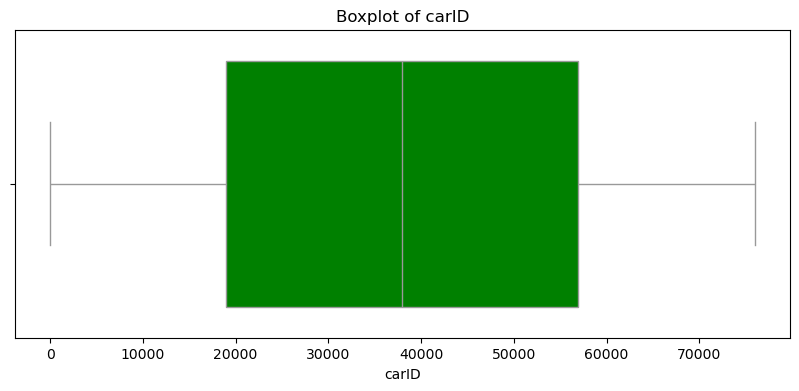

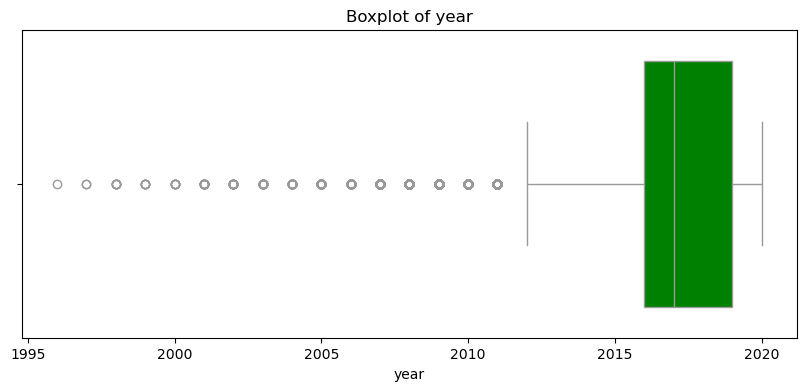

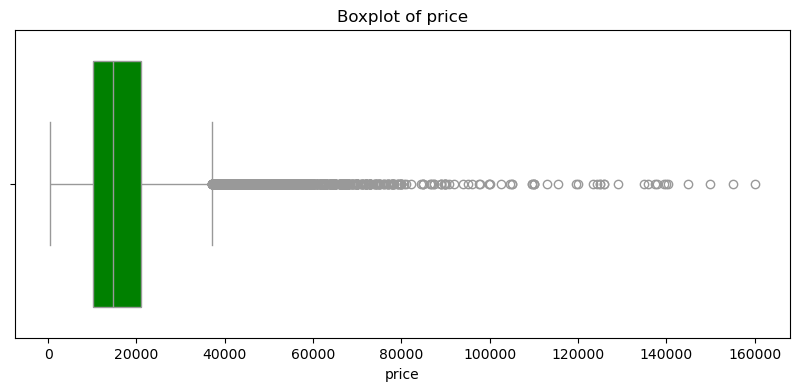

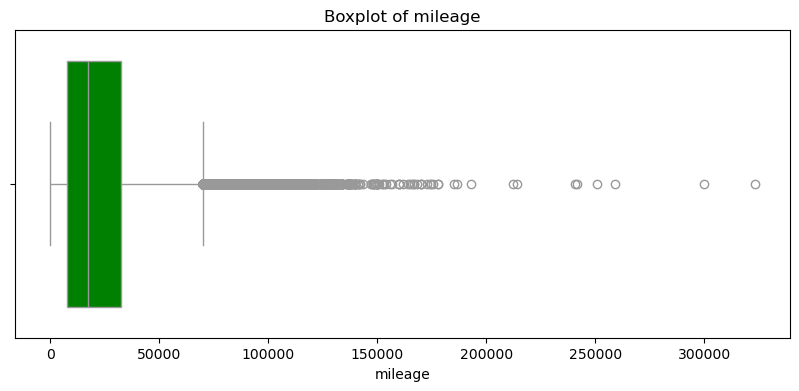

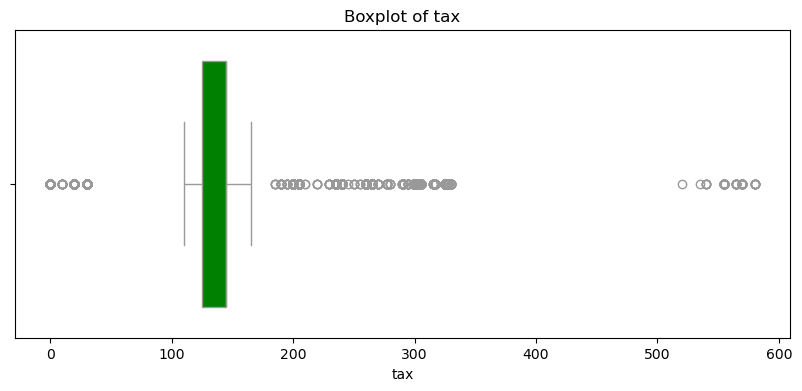

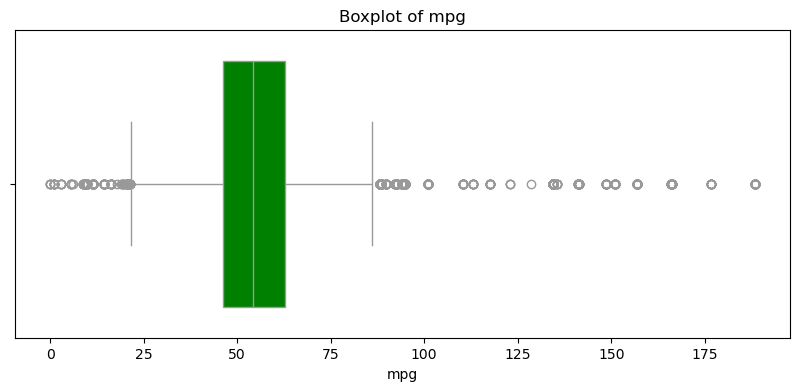

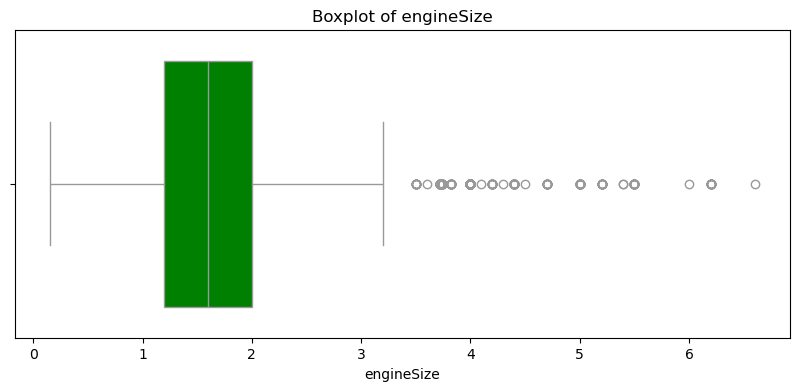

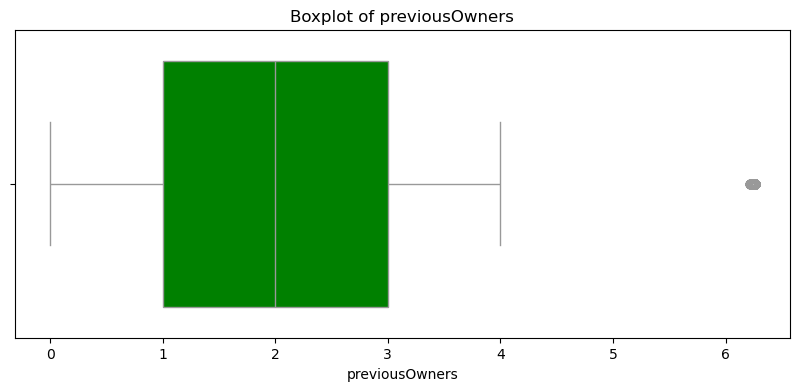

In [41]:
# Boxplots to check for outliers
for column in train.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=train[column], color='white', boxprops=dict(facecolor='green'))
    plt.title(f'Boxplot of {column}')
    plt.show()

Text(0.5, 1.02, 'Distribution of All Numerical Features in the Training Dataset')

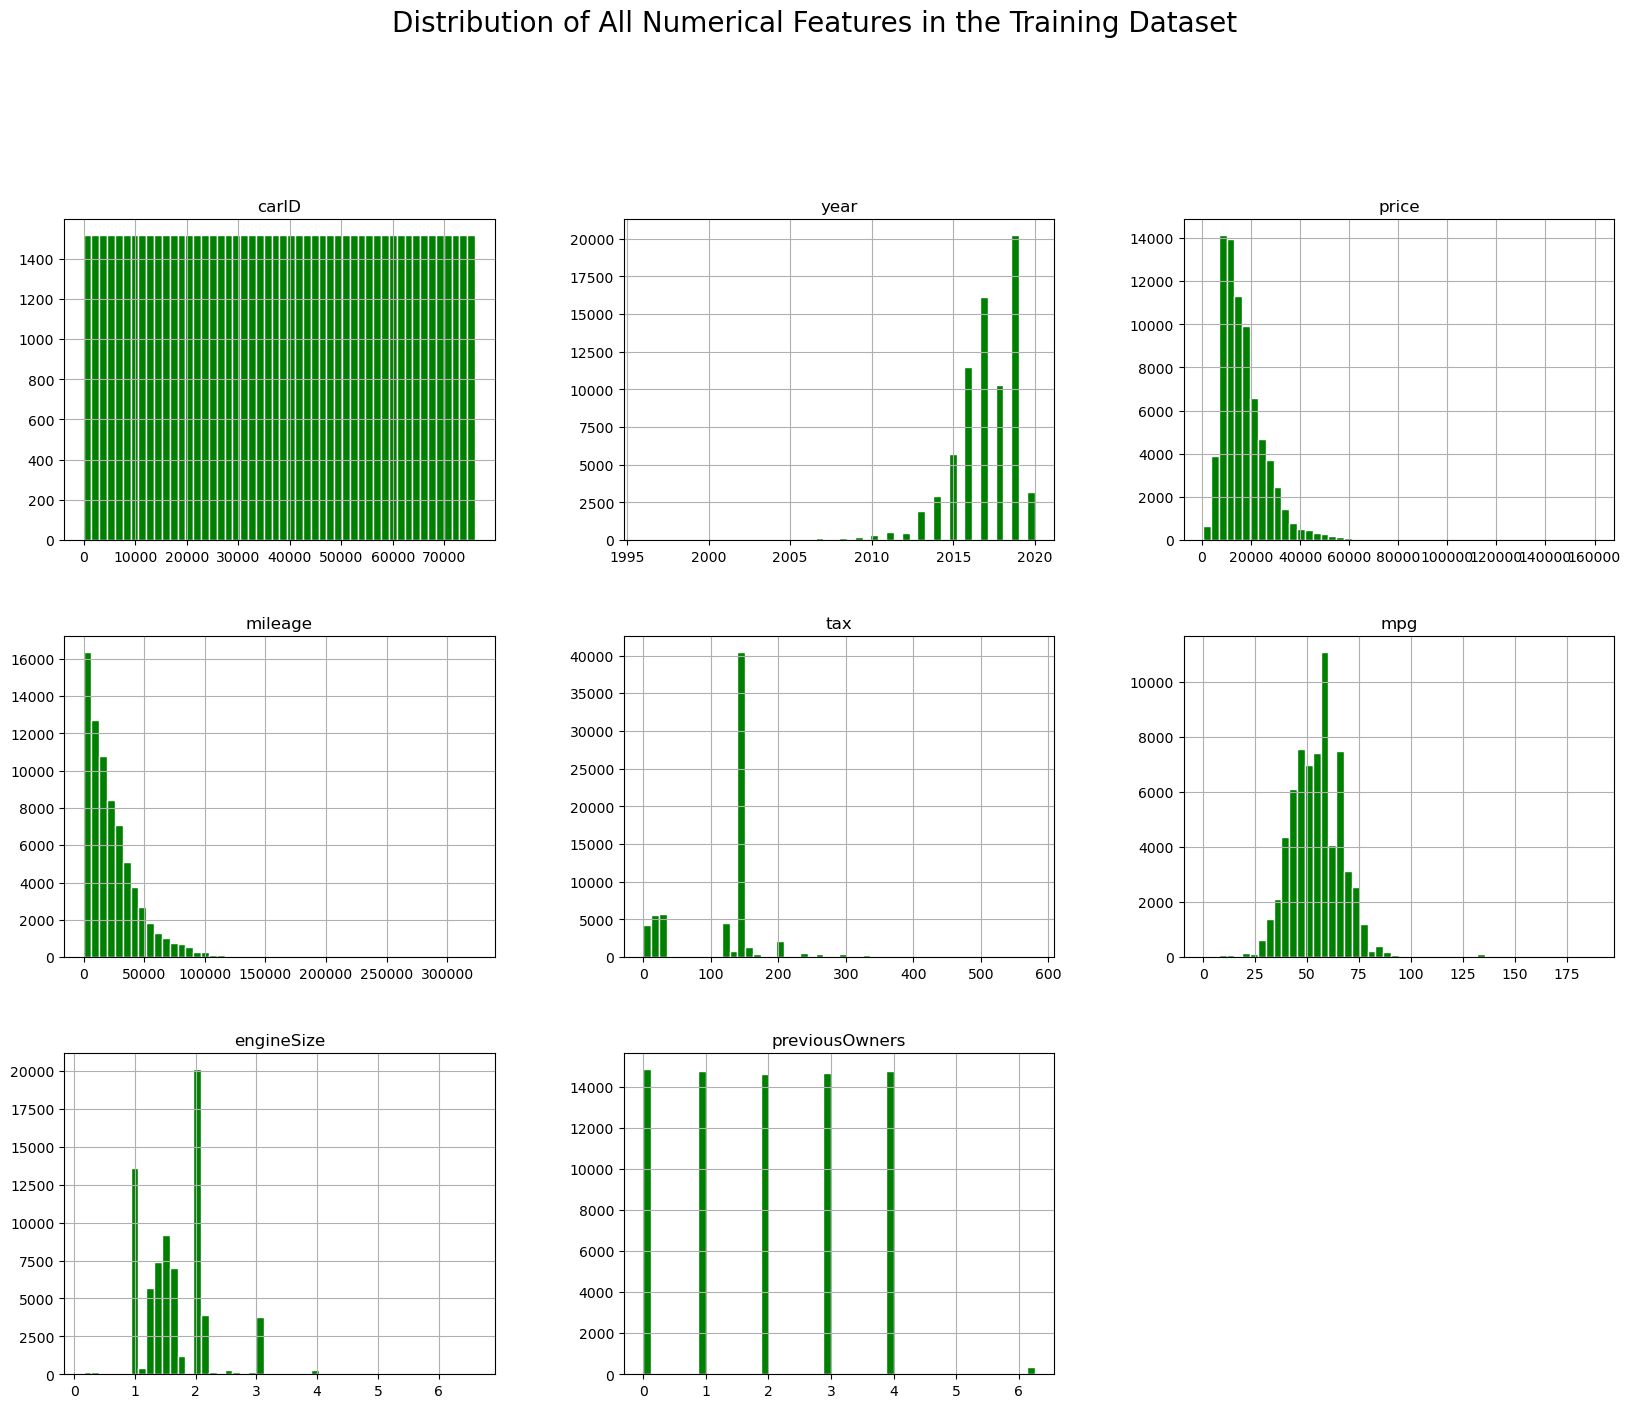

In [42]:
# Histograms for each numerical attribute
train.hist(bins=50, figsize=(20,15), color='green', edgecolor='white')
plt.gcf().suptitle("Distribution of All Numerical Features in the Training Dataset",
                   y=1.02,
                   fontsize= 20)

We performed some distribution checks and log-scale exploration for key variables to consider preprocessing choices:

 - `mileage`: long right tail, being a proxy for usage.
 - `tax`: showcases discrete bands with a long tail.
 - `mpg`: moderately skewed.
 - `engineSize`: slightly skewed.
 - `price` : very skewed (long tail to the right)


If log1p visibly reduces skew or compresses heavy tails, we may apply the transformation later to improve linear-model assumptions (more stable variance, fewer outlier effects).

**Conclusions:**
* We can try using log in `Mileage` to help center the distributions, as it shows to reduce the right tail;
* In `price`, with a tail to the right, the log truly centers the distribution, being now approximate to a normal one. So there may be advantages in using `log(price)` as well;
* In `mpg` we see that this transformation is not necessary, as the original distribution is already somewhat centered and the log doesn't compress the extreme values in the right side of the distirbution (winsorization can help correct this);
* `engineSize` the distribution is already relatively well-behaved and strongly discretised into engine classes (has discrete bands, and not a huge tail just some extreme values);
* `tax` showcases descrete bands as well (which can represent groups of cars regrading tax paid) and a right skew. However, the log transformation did not improve significantly its distribution.

**Variables that can benefit from a log transformation: price and mileage.**
   


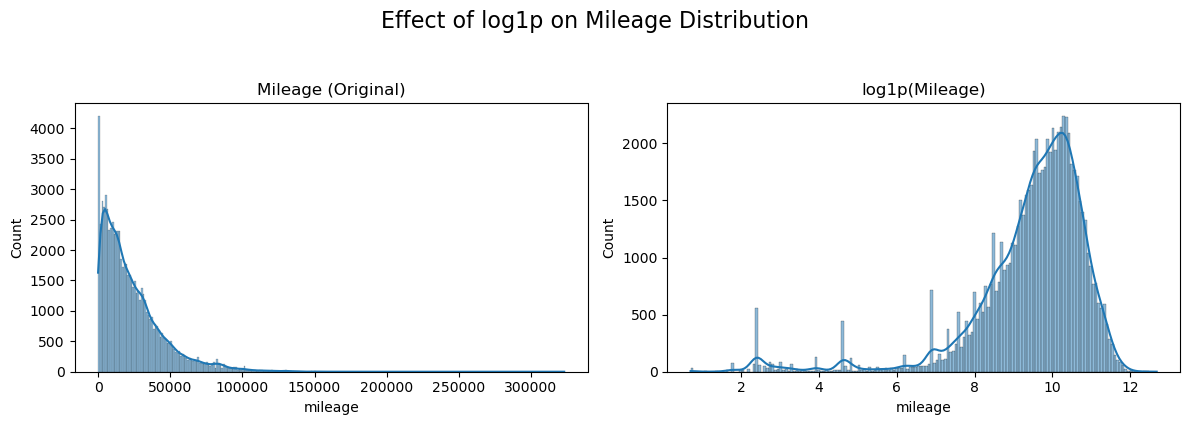

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(train["mileage"], kde=True, ax=axes[0])
axes[0].set_title("Mileage (Original)")

sns.histplot(np.log1p(train["mileage"]), kde=True, ax=axes[1])
axes[1].set_title("log1p(Mileage)")

fig.suptitle("Effect of log1p on Mileage Distribution",
             y=1.05,
             fontsize=16)

plt.tight_layout()
plt.show()


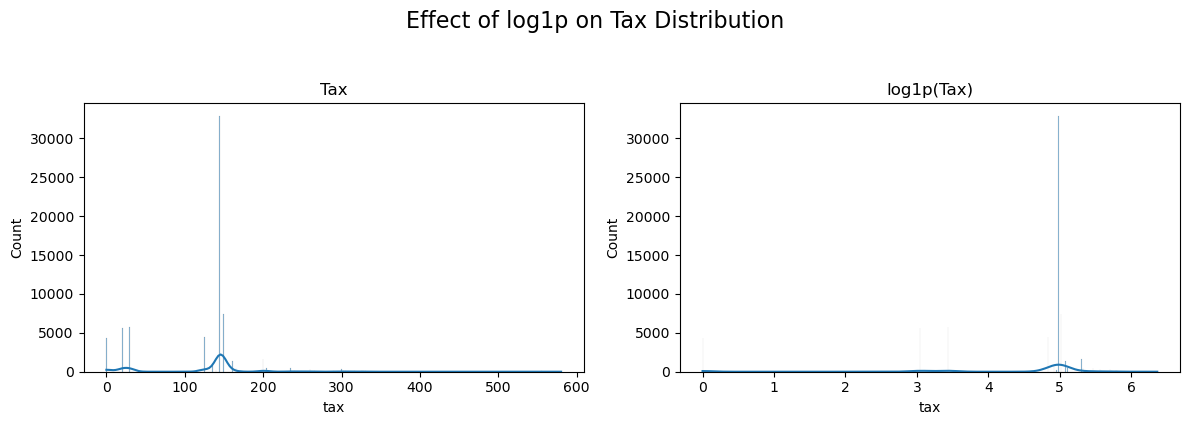

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(train["tax"], kde=True, ax=axes[0])
axes[0].set_title("Tax")

sns.histplot(np.log1p(train["tax"]), kde=True, ax=axes[1])
axes[1].set_title("log1p(Tax)")

fig.suptitle("Effect of log1p on Tax Distribution",
             y=1.05,
             fontsize=16)

plt.tight_layout()
plt.show()


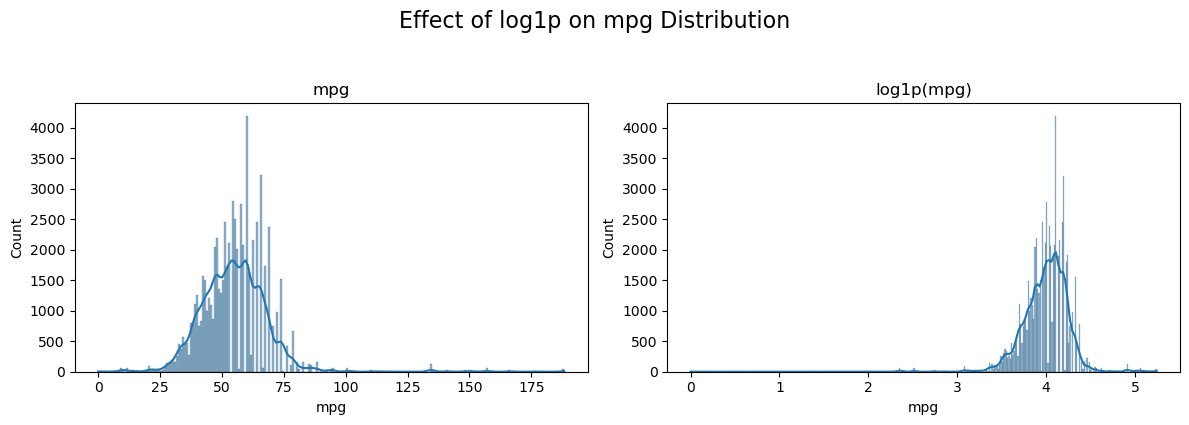

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(train["mpg"], kde=True, ax=axes[0])
axes[0].set_title("mpg")


sns.histplot(np.log1p(train["mpg"]), kde=True, ax=axes[1])
axes[1].set_title("log1p(mpg)")


fig.suptitle("Effect of log1p on mpg Distribution",
             y=1.05,
             fontsize=16)

plt.tight_layout()
plt.show()


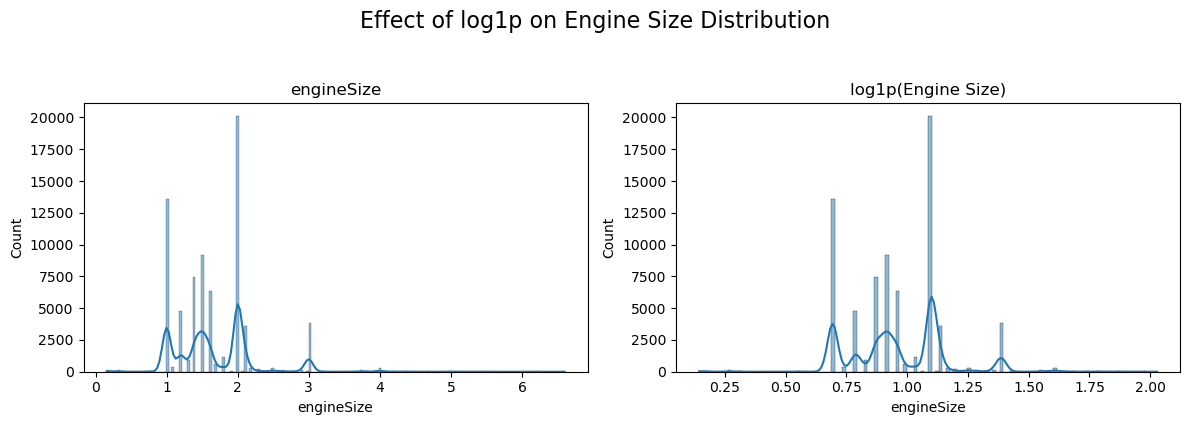

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))


sns.histplot(train["engineSize"], kde=True, ax=axes[0])
axes[0].set_title("engineSize")


sns.histplot(np.log1p(train["engineSize"]), kde=True, ax=axes[1])
axes[1].set_title("log1p(Engine Size)")


fig.suptitle("Effect of log1p on Engine Size Distribution",
             y=1.05,
             fontsize=16)

plt.tight_layout()
plt.show()

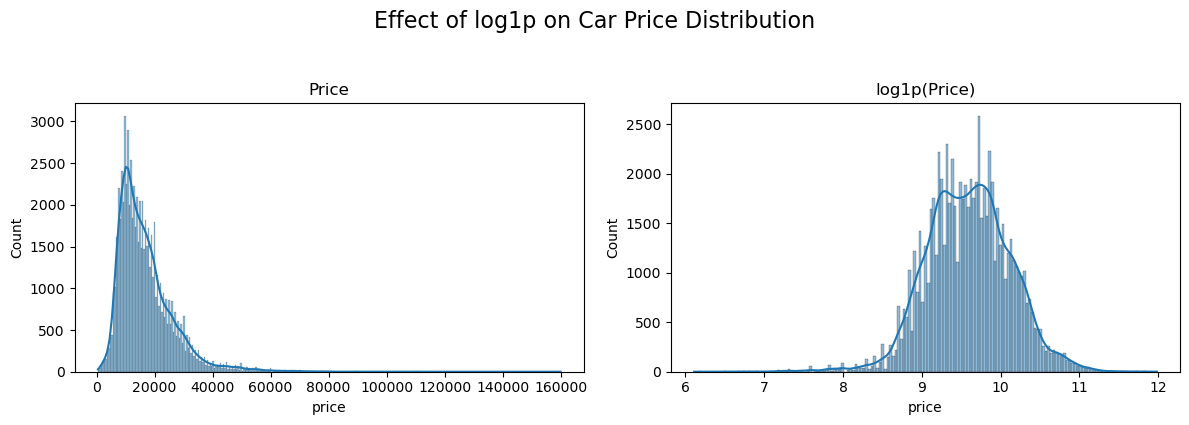

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(train["price"], kde=True, ax=axes[0])
axes[0].set_title("Price")

sns.histplot(np.log1p(train["price"]), kde=True, ax=axes[1])
axes[1].set_title("log1p(Price)")

fig.suptitle("Effect of log1p on Car Price Distribution",
             y=1.05,
             fontsize=16)

plt.tight_layout()
plt.show()

### 2.2.2 Multidimensional exploration 

In [48]:
brand_stats = (
    train
    .groupby('Brand')
    .agg(
        count=('price', 'size'),
        mean_price=('price', 'mean')
    )
    .sort_values('count', ascending=False)
)

transmission_stats = (
    train
    .groupby('transmission')
    .agg(
        count=('price', 'size'),
        mean_price=('price', 'mean')
    )
    .sort_values('count', ascending=False)
)

fuel_stats = (
    train
    .groupby('fuelType')
    .agg(
        count=('price', 'size'),
        mean_price=('price', 'mean')
    )
    .sort_values('count', ascending=False)
)


We can see big differences in prices for different brands, suggesting that brand is an important predictor of price, as we could expect. However, there's not a clear and observable relationship between the frequency of each brand and its price. Either way, there's some notes worth taking:

 1.   we clearly have **2 clusters of prices** here: high hand, with higher prices (mercedes, bmw and audi) and medium to cost friendly cars (ford, opel, toyota, skoda, hyundai and volkswagen);

 Considering this, a new **binary variable distinguishing these 2 price groups**, could help predict prices (something to be implemented in the feature engineering stages).

2.  toyota, skoda and hyundai are **the least frequent** and display on average **lower prices**;
3.  mercedes showcases the highest average price and it is the second most common car.
4. bmw and audi have similar frequencies and similar prices.

2, 3 and 4 suggest that **frequency encoding** might be a nice solution for brand, despite not having linear relationship between frequency and price. An alternative solution for the encoding of Brand can be One Hot Encoding, as we consider 9 new variables (dummies created) don't explode the number of features for our models.

Conclusion: we will test both frequnecy and one hot encodings on brand and see which one leads to the best results.

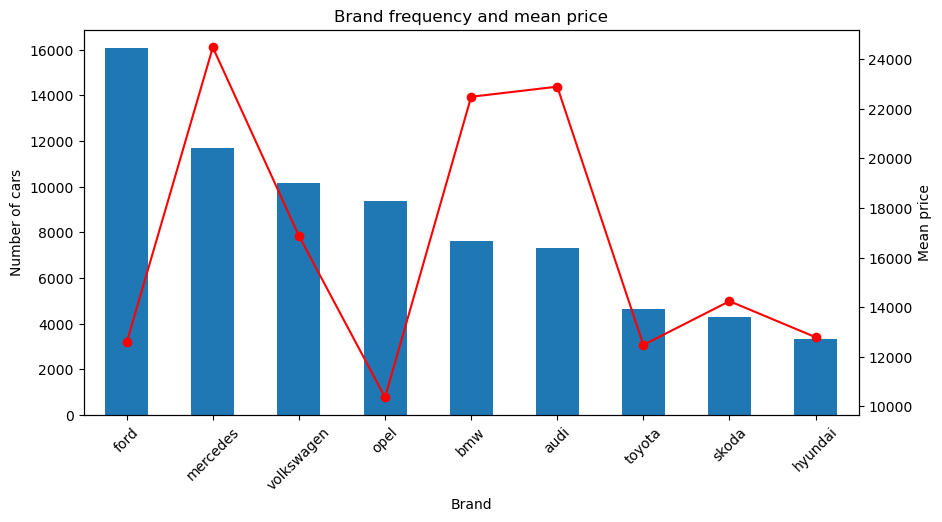

In [49]:
ax = brand_stats['count'].plot(kind='bar', figsize=(10, 5))
ax.set_ylabel("Number of cars")

ax2 = ax.twinx()
ax2.plot(brand_stats.index, brand_stats['mean_price'], marker='o', color='red')
ax2.set_ylabel("Mean price")

ax.set_title("Brand frequency and mean price")
ax.tick_params(axis='x', rotation=45)

We see considerable differences in price for the multiple transmission types, which means transmission might be a good predictor of price. More specifically we observe a big difference between manual cars an the other categories.

*  manual cars are the most common but the cheapest ones;
* semi-automatic and automatic cars are equally famous, but semi-automatic cars are significantly more expensive.
* other, only includes 5 cars, is clearly representing a rare segment of cars (can be considered noise even).

There's no clear relationship between price and frequency for the different types of transmission and few categories, therefore a nice option for encoding transmission is **One Hot Encoding**.

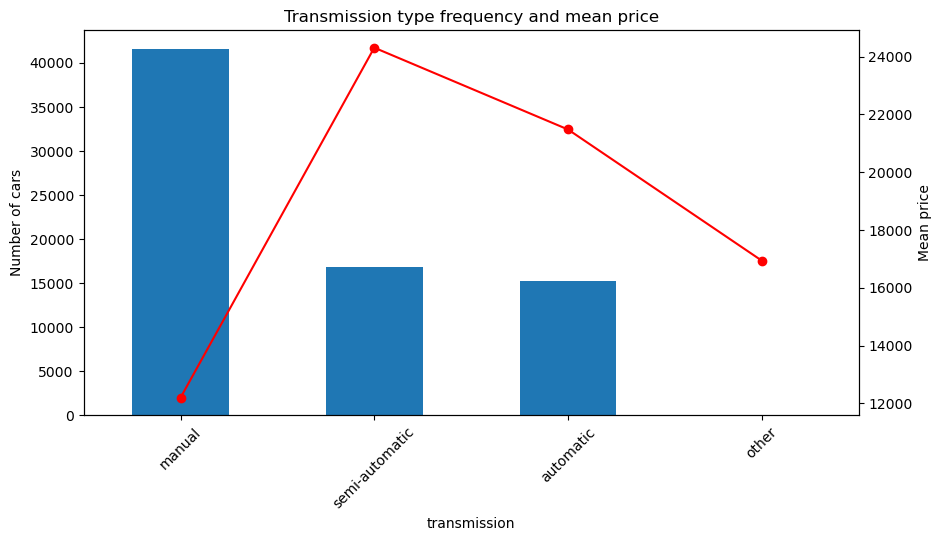

In [50]:
ax = transmission_stats['count'].plot(kind='bar', figsize=(10, 5))
ax.set_ylabel("Number of cars")

ax2 = ax.twinx()
ax2.plot(transmission_stats.index, transmission_stats['mean_price'], marker='o', color='red')
ax2.set_ylabel("Mean price")

ax.set_title("Transmission type frequency and mean price")
ax.tick_params(axis='x', rotation=45)

There's again differing average prices for each fuel type, therefore fuel is an important variable to consider.
*  petrol is the most common category but represents the cheapest cars;
* diesel and hybrid are the fuel types of the most expensive cars;
* there's only 4 eletric cares in our data;

This variable has low cardinality (few categories) therefore we may opt for **One Hot encoding** once again, as there's no clear relationship between price and frequency of fuel type categories.

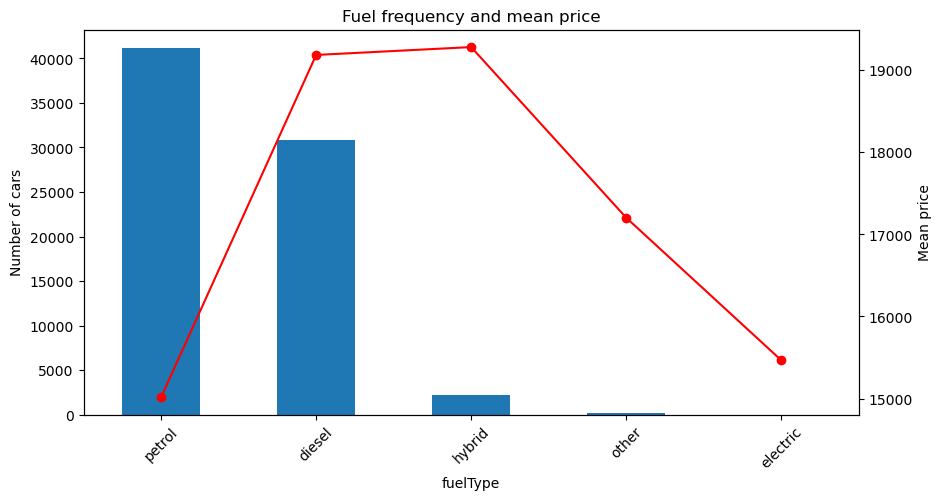

In [51]:
ax = fuel_stats['count'].plot(kind='bar', figsize=(10, 5))
ax.set_ylabel("Number of cars")

ax2 = ax.twinx()
ax2.plot(fuel_stats.index, fuel_stats['mean_price'], marker='o', color='red')
ax2.set_ylabel("Mean price")

ax.set_title("Fuel frequency and mean price")
ax.tick_params(axis='x', rotation=45)

Using JointGrids with the scatter of price vs independent feature and marginal histograms with the purpose of checking monotonic trends, linearity, and outliers. In a perfect scenario, we are looking to identify clear upward/downward trends, that would suggests positive/negative association with price.

The first visualization of price vs tax:
* Showcases a central group, of more regular values of tax and an additional group (smaller, thus more unusual) in the right hand side with higher values of tax but that doesn't display a specific relationship with price, only stretch the tail of the distribution of `tax`. We will **winsorize this variable, on the 99,2% quantile**, to preserve the normal tax behavior but still correct the more extreme cases.

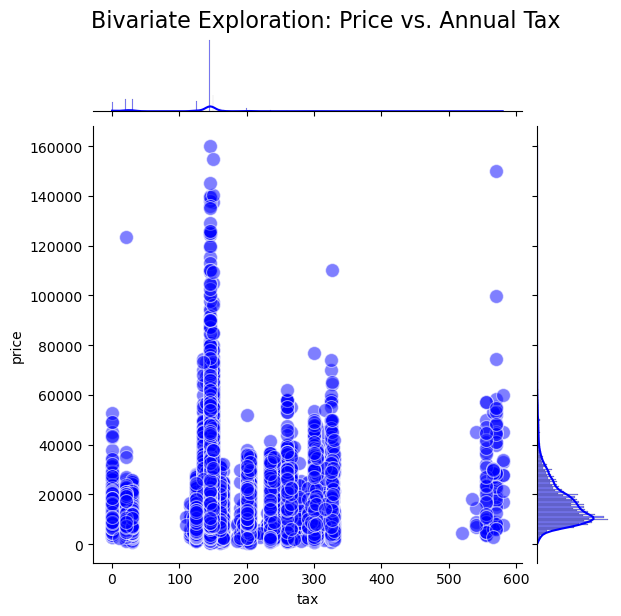

In [52]:
# Bivariate exploration: price ~ tax
exp_prictax = sns.JointGrid(data=train, x="tax", y="price")
exp_prictax.plot_joint(sns.scatterplot, s=100, alpha=.5, color='blue')
exp_prictax.plot_marginals(sns.histplot, kde=True, color='blue')

exp_prictax.figure.suptitle("Bivariate Exploration: Price vs. Annual Tax",
                        y=1.02,
                        fontsize=16)
plt.show()

The relationship between these variables is easy to understand, even though is not linear: cars with more kilometers (higher mileage) are cheaper; but for extreme values of mileage the prices don't drop anymore. Therefore, the few cars with a huge amount of kilometers don't add any new information/structure, only stretch the tail further to the right, which can worsen the performance of the models.

For this reason, we will **winsorize mileage** (in the 99,2% quantile), to preserve the natural tendency of the variable but limiting the influence of extreme cases.

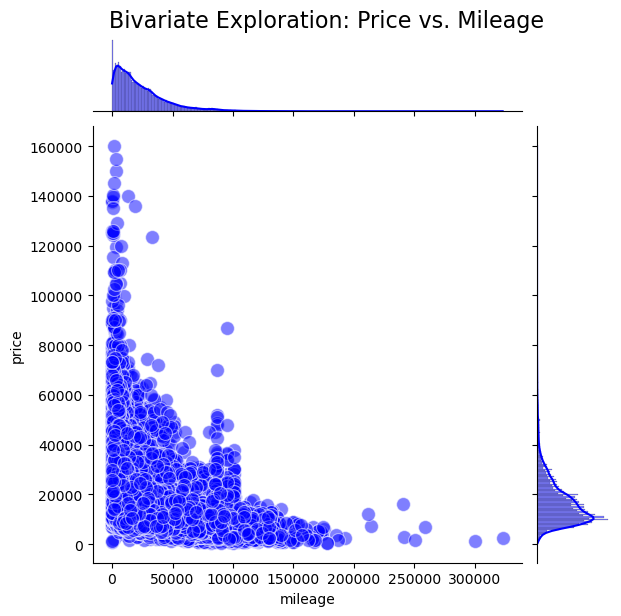

In [53]:
# Bivariate exploration: price ~ mileage
exp_pricmil = sns.JointGrid(data=train, x="mileage", y="price")
exp_pricmil.plot_joint(sns.scatterplot, s=100, alpha=.5, color='blue')
exp_pricmil.plot_marginals(sns.histplot, kde=True, color='blue')

exp_pricmil.figure.suptitle("Bivariate Exploration: Price vs. Mileage",
                        y=1.02,
                        fontsize=16)

plt.show()

We observe the majority of points being concentrated between 0 and 110 approximatly. In the right hand side there's a sparcer group of cars, exhibiting higher values of `mpg` that don't showcase any specific relationship with price. Possibly, these can be measuring errors or very specific car models that are not representative of the usual behavior of `mpg`.  To diminish the weight of these data points in the models, we will winsorize `mpg` (quantile 99,2).


Note that `mpg` can be interpreted as *"How far can I get on a tank?"*: very high values of miles per gallon translate into economic cars, that don't consume a lot. On the other hand, low `mpg` translates into low number of kilometers per gallon (cars that consume a lot), which are the cars showcasing the higher prices.

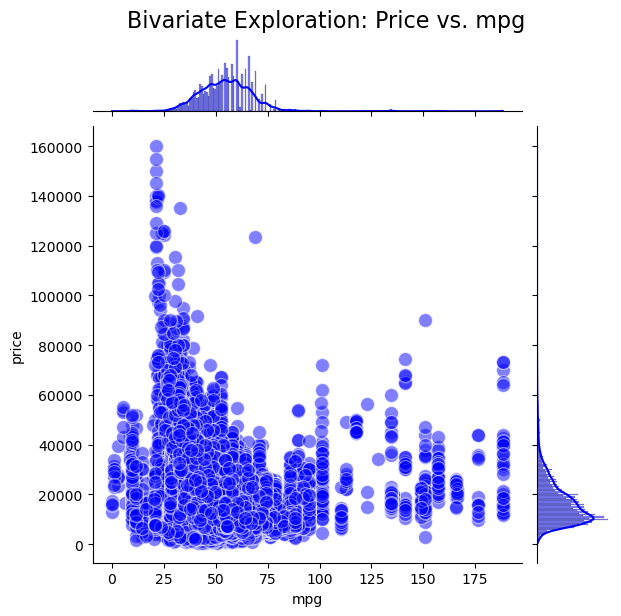

In [54]:
# Bivariate exploration: price ~ mpg
exp_pricmpg = sns.JointGrid(data=train, x="mpg", y="price")
exp_pricmpg.plot_joint(sns.scatterplot, s=100, alpha=.5, color='blue')
exp_pricmpg.plot_marginals(sns.histplot, kde=True, color='blue')

exp_pricmpg.figure.suptitle("Bivariate Exploration: Price vs. mpg",
                        y=1.02,
                        fontsize=16)

plt.show()

We identify some outliers in the right hand side of the graph, of cars with big engine sizes (>4 L). These cars with a big engine, showcase very high prices therefore representing a segment of cars worth keeping. However, there's some cars passing the 6L mark that have low prices. Therefore we can say that cars with engine sizes higher than 6L are somewhat noisy and could be winsorized.

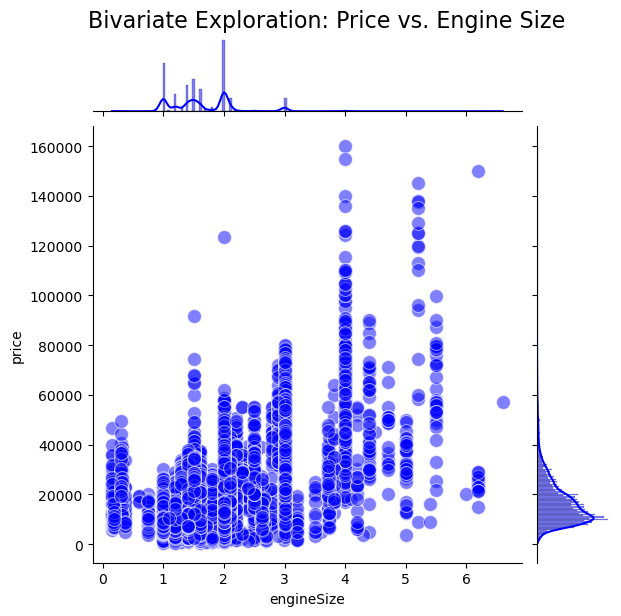

In [55]:
# Bivariate exploration: price ~ engineSize
exp_pricengs = sns.JointGrid(data=train, x="engineSize", y="price")
exp_pricengs.plot_joint(sns.scatterplot, s=100, alpha=.5, color='blue')
exp_pricengs.plot_marginals(sns.histplot, kde=True, color='blue')

exp_pricengs.figure.suptitle("Bivariate Exploration: Price vs. Engine Size",
                        y=1.02,
                        fontsize=16)

plt.show()

`Year` has the majority of its values comprised between 1995 and 2020, however there's some cars from 1970 (approximately) wich could be considered statistical outliers. However these might represent a special segment worth keeping.

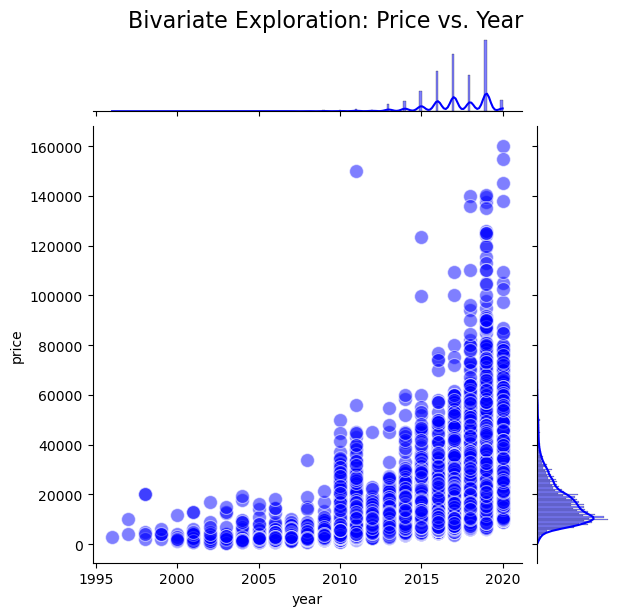

In [56]:
# Bivariate exploration: price ~ year
exp_pricye = sns.JointGrid(data=train, x="year", y="price")
exp_pricye.plot_joint(sns.scatterplot, s=100, alpha=.5, color='blue')
exp_pricye.plot_marginals(sns.histplot, kde=True,color='blue')

exp_pricye.figure.suptitle("Bivariate Exploration: Price vs. Year",
                        y=1.02,
                        fontsize=16)


plt.show()

The pairplot below represents the relationships between all numeric variables:
* we can see there's no clear linear relationship between features;
* and, as previously observed, there's also no linear relationships between features and the target (price)

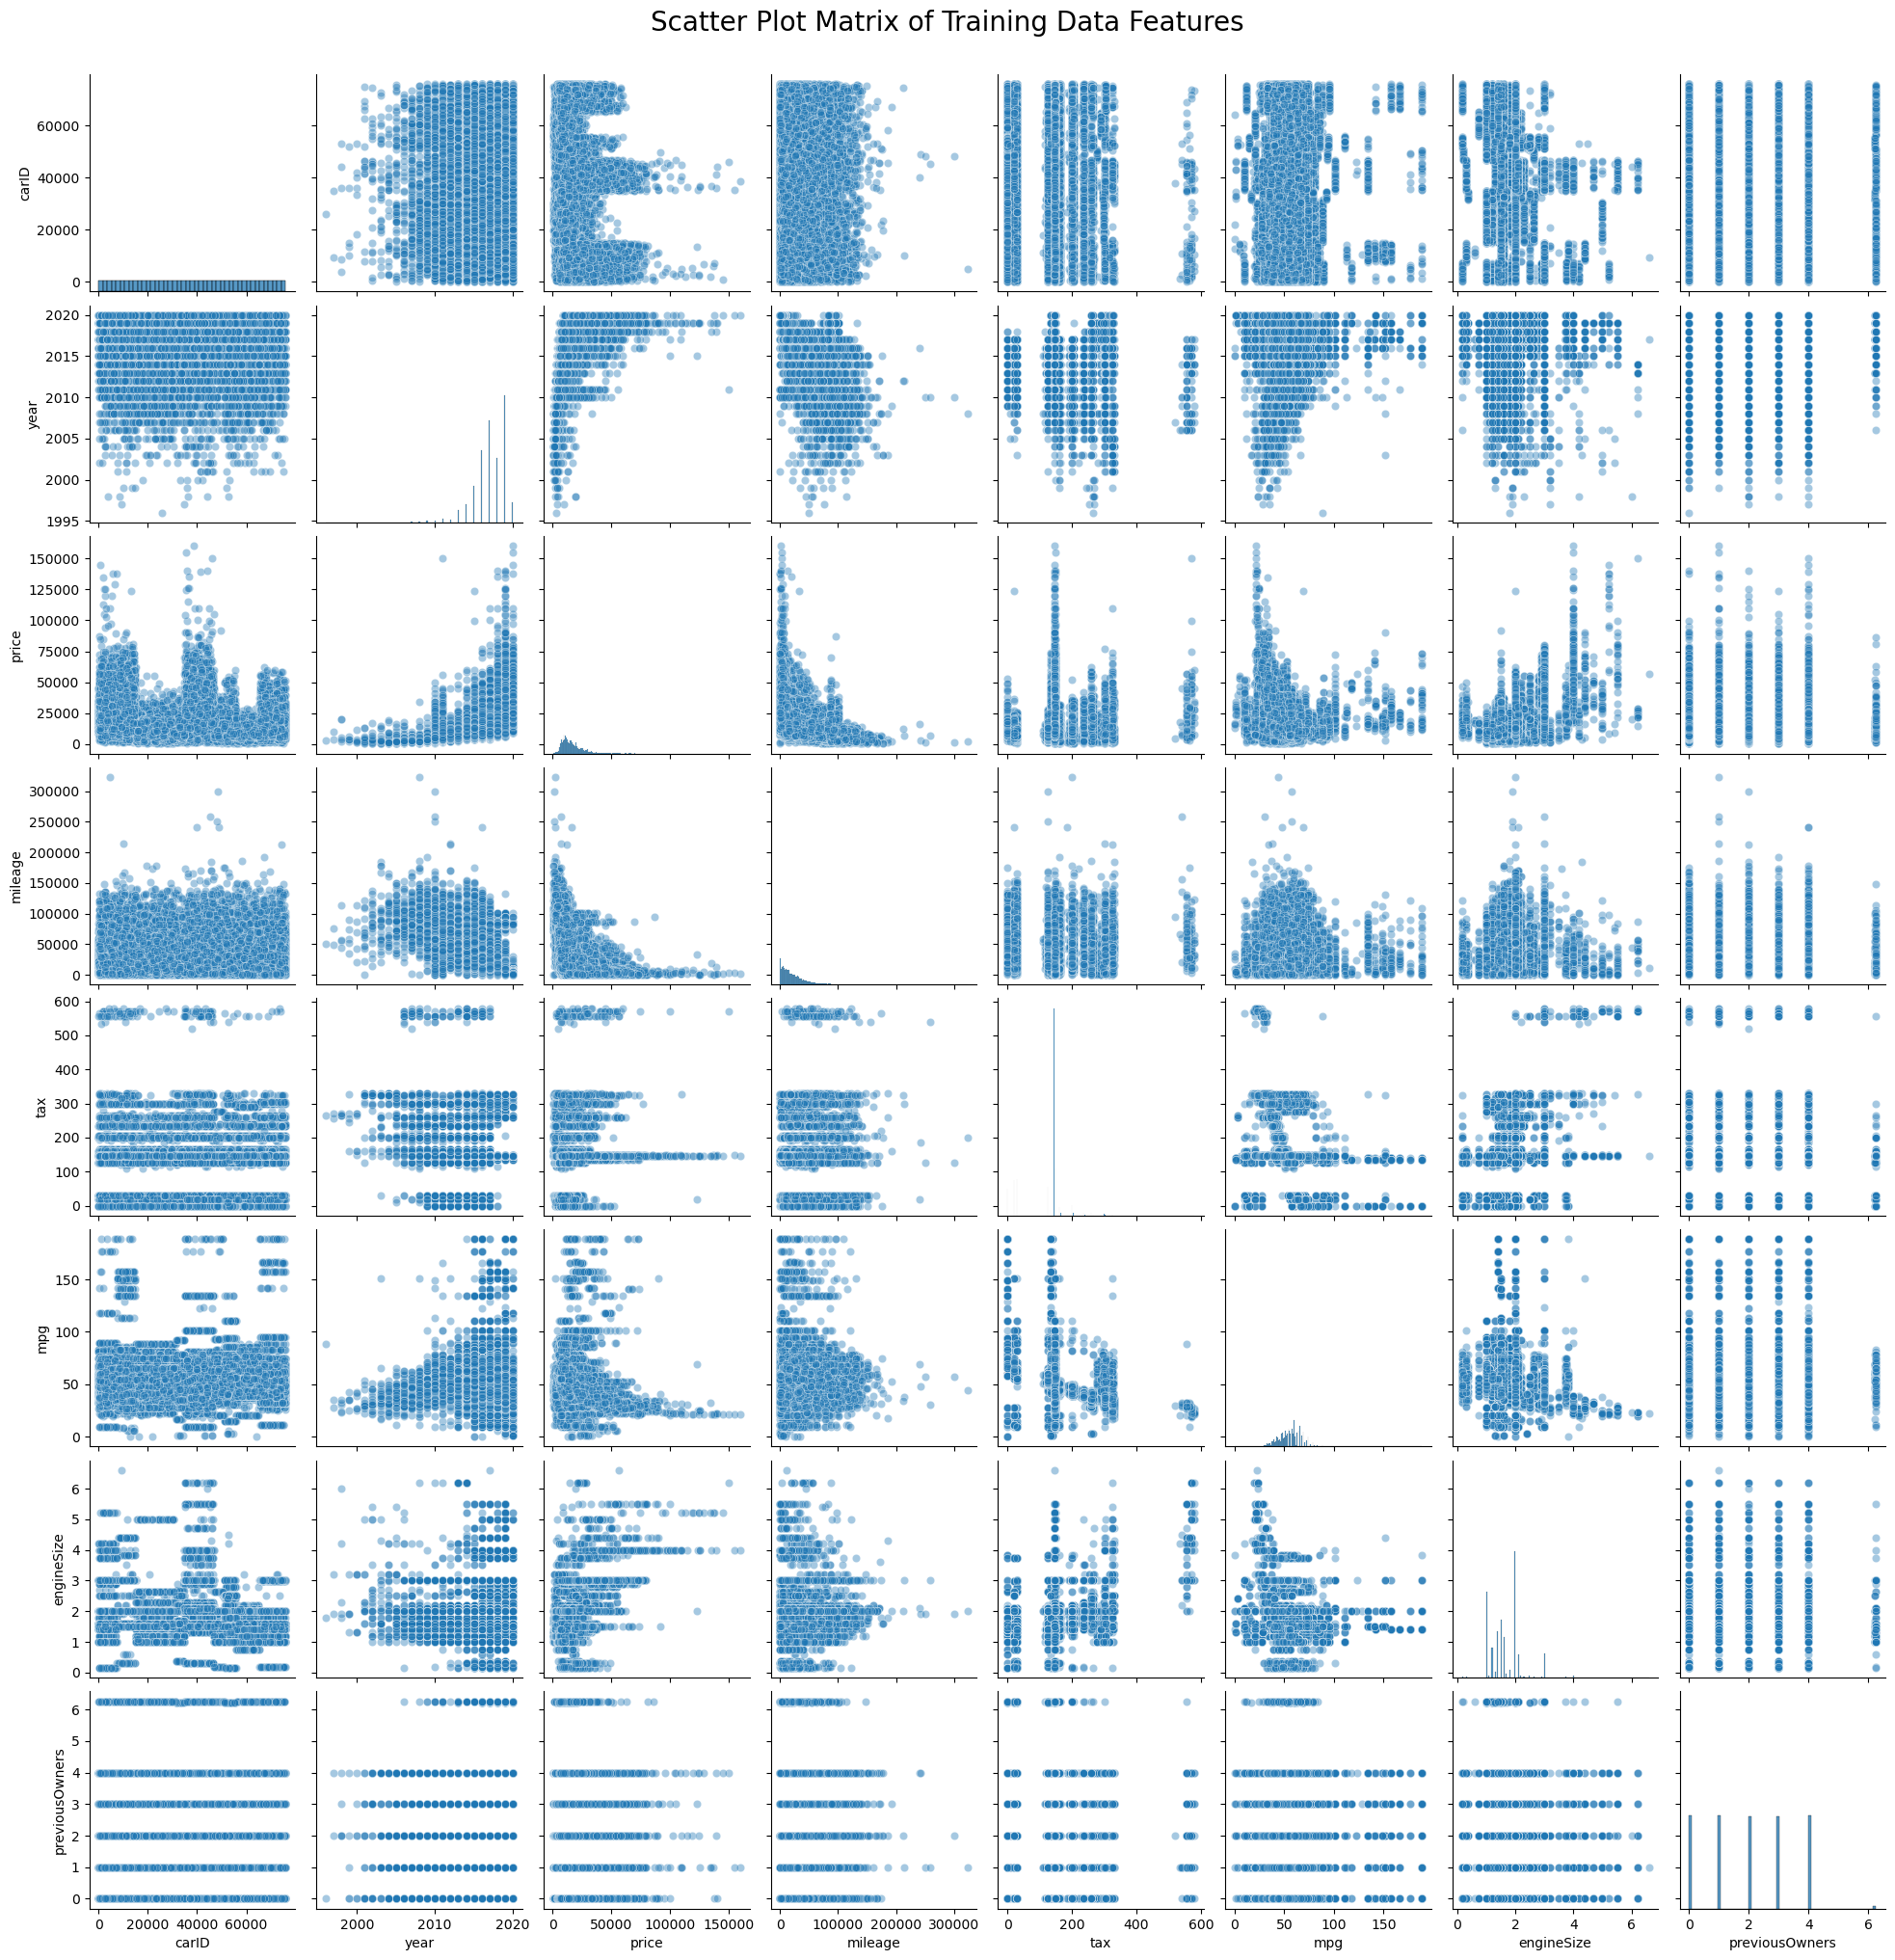

In [57]:
pair = sns.pairplot(train,plot_kws={'alpha':0.4})

pair.figure.suptitle("Scatter Plot Matrix of Training Data Features",
               y=1.02,
               fontsize=20)

plt.show()

The correlation matrix quantifies the relationships above represented in the scatter plots.

* The highest correlations exhibited involve **price, mileage and year**, meaning that year and mileage will be good predictors of price. 
* On the other hand, **paint quality and previous onwers** display 0 correlation with the target, probably having very **low predictive power**.

It is important to note that this visualization it is only suggestive, and we must not take any action based on it, since it uses both train and validation data to compute the correlations. Feature selection  will be performed inside in the k-fold implementation.

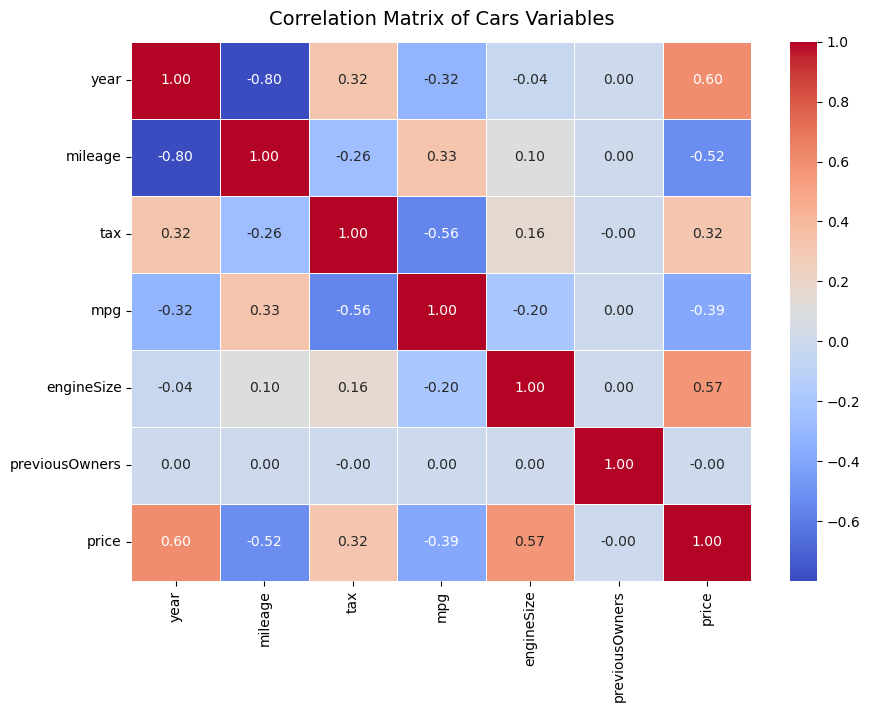

In [58]:
num_cols=['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'price']

# Calculate correlation matrix
corr_matrix = train[num_cols].corr(method='spearman')

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Matrix of Cars Variables", fontsize=14, pad=12)
plt.show()

Finally, to better understand the main characteristics of cars for many price points, we split the target (price) into 10 deciles (0 = 10% cheapest … 9 = 10% most expensive), an observe the median value of year, mileage, engineSize, mpg and tax, for each of the deciles. This "profiling" of price deciles helps understand how features vary according to price.

For interpretation purposes we normalized the variables using min–max so that all of them have a 0–1 scale. This scaler is sensitive to outliers, however, this is just used for interpretation and conclusions will be taken with a grain of salt.


 All these variables vary between price deciles, meaning they potentially have insights useful for prediction.
 - `mileage` decreases in higher deciles (more expensive cars tend to have fewer miles.)
 - `year` increases in higher deciles ( more expensive cars are more recent.)
 - `engineSize` increases in top deciles (larger engines in premium segments.)
 - `mpg` decreases as price increases (efficiency vs. performance trade-off.)
 - `tax` tends to increase with price (discrete bands linked to emissions/engine size).

Text(0.5, 1.0, 'Price decile profiles')

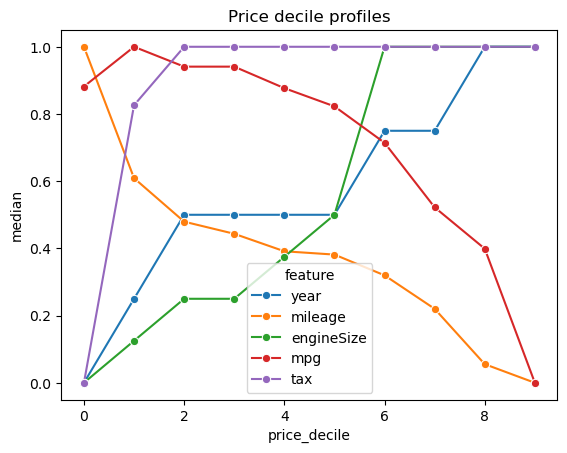

In [59]:
# Price decile profiles
train_viz = train.copy()
train_viz["price_decile"] = pd.qcut(train_viz["price"], 10, labels=False)
agg = train_viz.groupby("price_decile").agg({
    "year":"median", "mileage":"median", "engineSize":"median", "mpg":"median", "tax":"median",
}).reset_index().melt("price_decile", var_name="feature", value_name="median")


# 0–1 normalization by feature
agg["median"] = agg.groupby("feature")["median"].transform(
    lambda s: (s - s.min()) / (s.max() - s.min()) # min max scaler
)

sns.lineplot(data=agg, x="price_decile", y="median", hue="feature", marker="o")
plt.title("Price decile profiles")


<a id="3"></a>

# **3. Feature Engineering**

We decided on creating 4 new variables:
* `car_age`: how old the car is based on year column.

* `mileage_per_year`: a proxy for how used the car is, combining year (how old) and mileage (how worked out is)

* `is_high_end`: a flag to distinguish higher hand brands. (boolean)

* `engine_per_litre_efficiency`: efficiency per motor capacity, a ratio between miles per gallon and engine size.

Additionally, as the previous visualizations revealed that log transformations helped center de the distributions of some variables, we are going to apply them later, to `price` and `mileage`, inside the cross validation pipeline.

In [60]:
# some random examples of higher hand brands that might exist on the dataset
LUXURY = {"audi","bmw","mercedes","jaguar","porsche","lexus","volvo","land rover"}

def add_features(df):
    df = df.copy()
    # 1) car_age
    if "year" in df:
        df["car_age"] = 2020 - df["year"]

    # 2) mileage_per_year (careful with div/0 e NaN)
    if {"mileage","year"}.issubset(df.columns):
        age = (2020 - df["year"]).replace(0, np.nan)
        df["mileage_per_year"] = (df["mileage"] / age).replace([np.inf, -np.inf], np.nan)

    # 3) is_high_end (NaN -> 0)
    if "Brand" in df:
        df["is_high_end"] = df["Brand"].isin(LUXURY).astype(int).fillna(0)

    # 4) engine_per_litre_efficiency (protect denom=0)
    if {"mpg","engineSize"}.issubset(df.columns):
        denom = df["engineSize"].replace(0, np.nan)
        df["engine_per_litre_efficiency"] = (df["mpg"] / denom).replace([np.inf, -np.inf], np.nan)

    return df

In [61]:
train = add_features(train)
test = add_features(test)

It is important to attempt to assess the predicitve power of these engineered features, and the multicolinearity with the original ones. 

Analysing the correlations matrix:
* `car_age` and `year`, as expected are perfectly correlated and are equally correlated with the target. Therefore we should maintain just one (the new, car_age) and delete `year`.
* `engine_per_litre_efficiency`, `car_age`, `mileage_per_year` all showcase correlations above 0.5 (or below -0.5) therefore all seem to be meaningful to predict price.

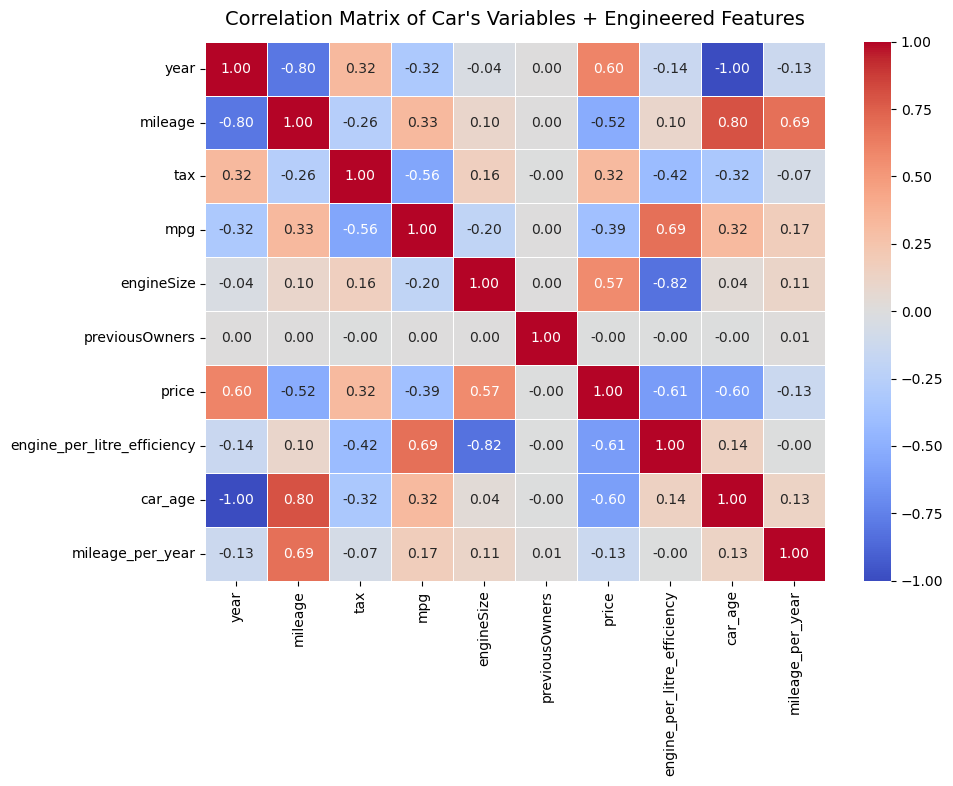

In [62]:
num_cols=['year', 'mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'price',
          'engine_per_litre_efficiency', 'car_age', 'mileage_per_year']

# Calculate correlation matrix
corr_matrix = train[num_cols].corr(method='spearman')

# Create the heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Matrix of Car's Variables + Engineered Features", fontsize=14, pad=12)
plt.show()

In [63]:
train = train.drop(columns=['year'])
test = test.drop(columns=['year'])

By exploring the distributions of the engineered features, we identified:
* right skewed distributions in the 3 numerical variables, more severe in `mileage_per_year` and `engine_per_litre_efficiency`;
* outliers in the right side of the distribution of `mileage_per_year`;
It is necessary to consider applying log1 tranformations to compress the tails or center the distributions (explored in the next visualizations) and winsorization in case extreme values are not compressed by log1.
 

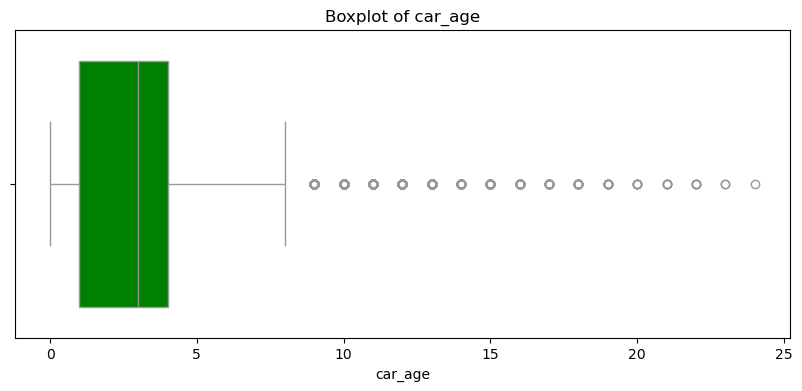

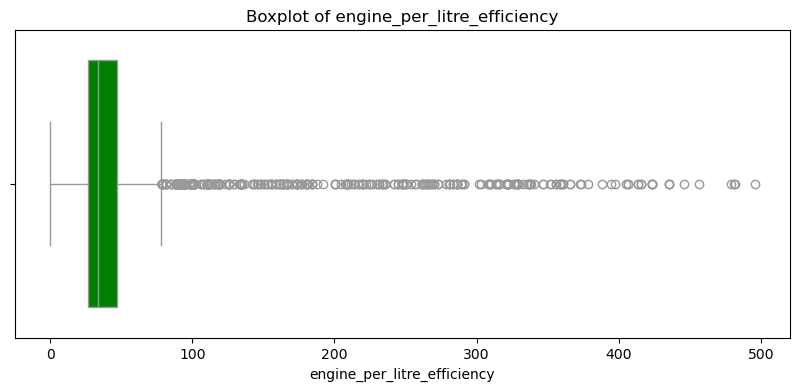

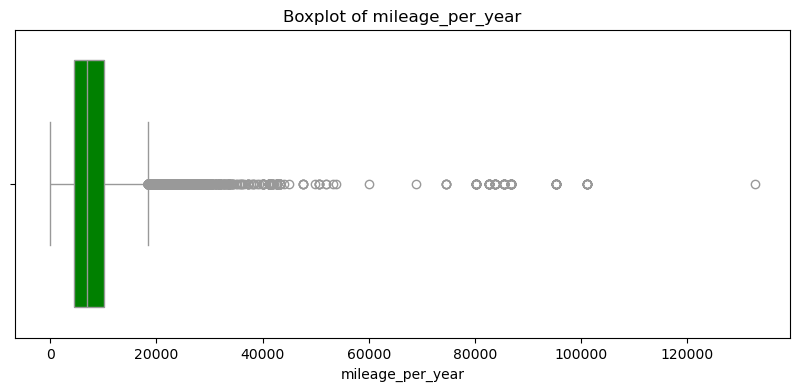

In [64]:
# Boxplots to check for outliers
for column in ["car_age", "engine_per_litre_efficiency", "mileage_per_year"]:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=train[column], color='white', boxprops=dict(facecolor='green'))
    plt.title(f'Boxplot of {column}')
    plt.show()

**Conclusions:**
* `car_age` has a small range of values (varies between 0-25) and showcases discrete bands (many cars from 2016 and 2017). To preserve these natual patterns we will not use log1(car_age). 
* `engine_per_litre_efficiency` can benefit from a log transformation as we can see it helps to center its ditribution, being more close to a normal one.
* `mileage_per_year` also becomes less skewed by using a log transformation;
* both `engine_per_litre_efficiency` and `mileage_per_year` can use winsorization, to minimize the effect of the extreme values in the right hand side of their distribution.

c:\Users\guilh\anaconda3\envs\Fall2526\Lib\site-packages\pandas\core\arrays\masked.py:691: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs2, **kwargs)


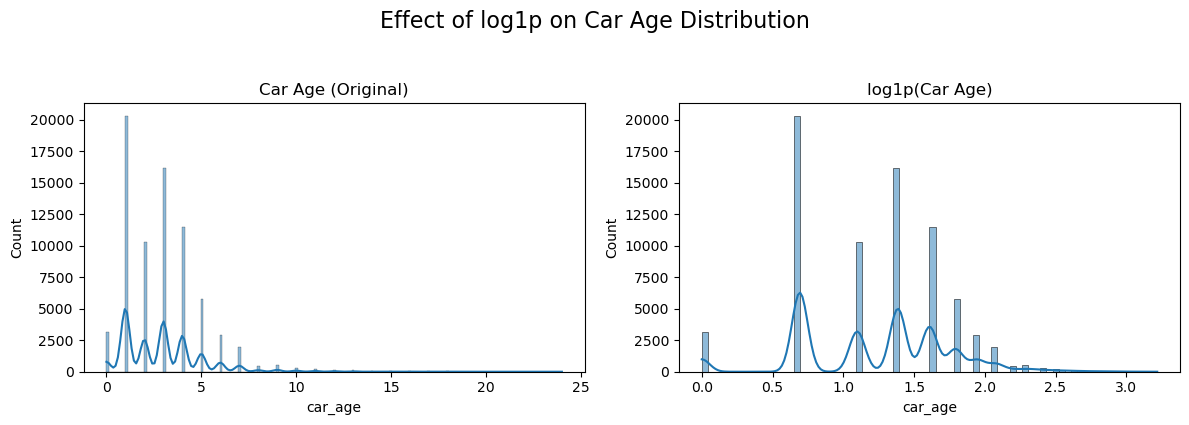

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(train["car_age"], kde=True, ax=axes[0])
axes[0].set_title("Car Age (Original)")

sns.histplot(np.log1p(train["car_age"]), kde=True, ax=axes[1])
axes[1].set_title("log1p(Car Age)")
fig.suptitle("Effect of log1p on Car Age Distribution",
             y=1.05,
             fontsize=16)

plt.tight_layout()
plt.show()


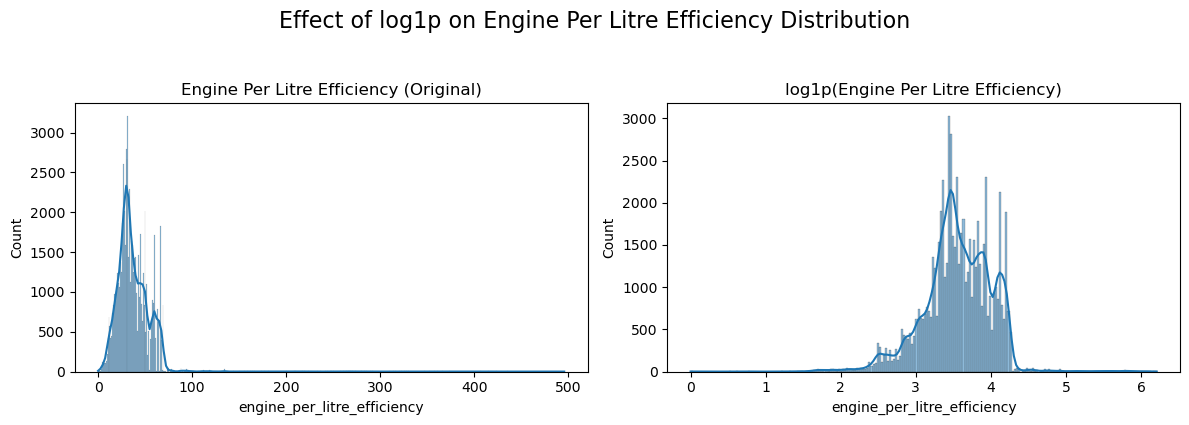

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(train["engine_per_litre_efficiency"], kde=True, ax=axes[0])
axes[0].set_title("Engine Per Litre Efficiency (Original)")

sns.histplot(np.log1p(train["engine_per_litre_efficiency"]), kde=True, ax=axes[1])
axes[1].set_title("log1p(Engine Per Litre Efficiency)")
fig.suptitle("Effect of log1p on Engine Per Litre Efficiency Distribution",
             y=1.05,
             fontsize=16)

plt.tight_layout()
plt.show()


c:\Users\guilh\anaconda3\envs\Fall2526\Lib\site-packages\pandas\core\arrays\masked.py:691: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs2, **kwargs)


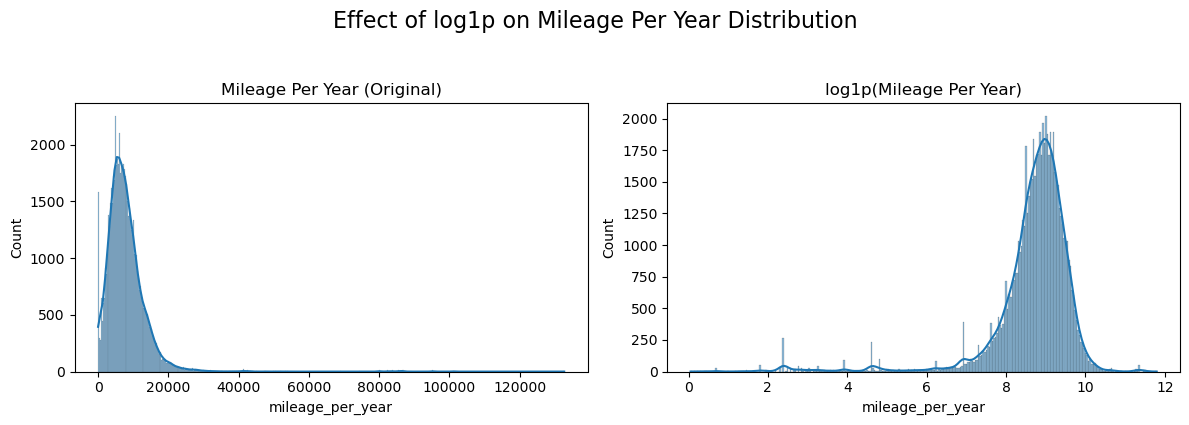

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(train["mileage_per_year"], kde=True, ax=axes[0])
axes[0].set_title("Mileage Per Year (Original)")

sns.histplot(np.log1p(train["mileage_per_year"]), kde=True, ax=axes[1])
axes[1].set_title("log1p(Mileage Per Year)")
fig.suptitle("Effect of log1p on Mileage Per Year Distribution",
             y=1.05,
             fontsize=16)

plt.tight_layout()
plt.show()


### II.2. Cleaning and preprocessing strategy

At this point, we are well informed to come up with a strategy, and to summarize the steps already applied.
Based on the EDA, we designed a preprocessing pipeline with the following main components:

- **1.Text normalisation for `Brand` and `model`**  (already applied in the steps above)

  We applied a custom `norm_text` + `clean_model` procedure to enforce consistent spelling and formatting of brand, model, transmission and fuelTypes. For the first, we deliberately avoided fuzzy matching to prevent accidental merges between genuinely different models. For the other 3, functions were defined to apply fuzzy matchig. Extremely short or junk tokens (e.g. single letters) are mapped to `NaN`. It is relevant to note that our fuzzy matching implementation works in such a way that creates dictionaires of suggested corrections for each typo, and applies it on each car with categories differing from the canonical values. Therefore, applying it outside of the pipeline doesn't constitute data leakage.


- **2.Feature engineering**  (already applied in the steps above)

  We engineered several variables that were more directly interpretable than the raw inputs, such as:
  - `car_age` (current year minus registration year),
  - `mileage_per_year` (total mileage divided by car_age, when available),
  - `engine_per_litre_efficiency` (mpg per litre of engine size).
  These features capture usage intensity and efficiency in a more stable way than raw mileage or mpg alone.

- **3.Outlier treatment via winsorization** (to apply inside CV)

  To limit the influence of extreme values without discarding observations, we applied clipping inside the CV pipeline to `mileage`, `tax` and `mpg` at a high quantile (e.g. 99.2%). The clipping thresholds (`clip_info`) are learned on the training fold only and then reused for validation and test, ensuring no leakage.


- **4.log transformations** (to apply inside CV)

  To help center the most skewed distributions, we apply log1 tranformations in `mileage`, `mileage_per_year`, `engine_per_litre_efficiency` and `price`. In the case of price, before reporting any model performance metrics, or price predictions to export to kaggle, we revert the log1(price), so that the scale is aligned to the original form.


- **5.Encoding of categorical variables** (to apply inside CV)

  High-cardinality fields  (`model`) are transformed via **frequency encoding**, replacing each level by its relative frequency in the training fold. Lower-cardinality variables such as `fuelType`, `Brand` and `transmission` are one-hot encoded after imputing missing values with the mode. The set of dummy columns created in the training fold is stored and reused to align validation and test matrices.


- **6.Missing-value imputation and scaling** (to apply inside CV)

  Numerical features are imputed with the median of the training fold and, for models that are sensitive to feature scales (e.g. linear models, KNN, MLP, gradient boosting), we apply a `RobustScaler`. The imputation vector and scaler are fitted **only on the training split** and then applied to the corresponding validation split and to the final test data. Categorical features will be imputed with the mode, except for `Brand` and `model` that will have a category unknown grouping the missing values, instead of imputing with some statistic.


- **7.Feature selection inside CV**  
  When feature selection is used ( `SelectKBest`, RFE, and SelectFromModel), the selector is fitted on the training fold and then applied to the validation fold through our `run_model` and `evaluate_model` functions. This guarantees that the choice of features is not influenced by the validation data.


Steps 3 to 7 are implemented inside our custom `run_model` (fit-time) and `transform_X` / `evaluate_model` (transform-time) functions, so that every aspect of preprocessing is learned within the cross-validation loop and reapplied consistently at deployment time.

<a id="3"></a>

# **4. Split using K-fold Cross Validation**

The present section applies all preprocesing steps that weren't applied yet (3. to 7., as the previous summary outlines) and makes predictions to obtain price (predicted values), and compare them to the real values.

 We will start by runing a plenthora of models, including algorithms discussed in the course (linear regressions, KNN, DT, Random Forest, GBR and MLP) and other models that seemed suitable for the problem (other ensembles that usually perform well in these problems).

**Model Assessment strategy:**
 We evaluated models through 3-fold cross validation, reporting MAE, RMSE, adjusted R2 and R2.

 We will be focusing primarily on **Mean Absolute Error**,  since it is directly interpretable as average absolute pricing error in £ per car and is robust to occasional extreme prices (does not penalize larger errors). As secondary strategy, we analyse R2, to understand how much the variability of price is explain by our model, and adjusted R2 when testing solutions using differing number of features.

 The we have 4 functions that work together and apply the cross validation pipeline:
 * `run_model`: fits all the preprocessing and the model on the training data and returns all the necessary elements to transform train, validation and test data;

 * `transform_X`, used inside `evaluate_model` and `predict_on test`; applies (transform) all preprocessing steps fitted in `run_model` to validation and test.

 * `evaluate_model` makes predictions and compares them to the real values; it is used both on trainning and validation data.

 * `avg_scores` makes the for loop splitting the data into 3 folds and coordinates `run_model` and `evaluate_model`, to fit on each fold the train and predict on train and test.

 * `predict_on test` preprocesses the test data, using `transform_X` and makes predictions.

Separating the taget from the independent features, and dropping the `carID` to prevent it from being used in the model.

In [68]:
TARGET = 'price'
X_train_val = train.drop(columns=[TARGET, 'carID'])
y_train_val = train[TARGET]

<a id="3"></a>

# **5. Model Benchmarking**

## 5.1. Common baseline pipeline

For the initial testing of models, we decided on a common baseline pipeline, using the same preprocessing for all models to compare their results accurately.
* **One Hot encoding** for `transmission`, `fuelType` and `Brand`, and **frequency encoding** for `model`.
* **Categorical Imputation**: impute with the mode in `trasmission` and `fuelType`; `Brand` and `model` will not be imputed, to not incur into creating unreal combinations of brand-model. For brand, there will be a category called unknown, and for model all Nans will have 0.0 frequency.
* **Numeric imputation**: all numeric variables will be imputed with the median.
* **Scaler**: use the Robust Scaler for all models. We chose this option because several numeric variables in this dataset exhibit heavy tails and occasional extreme values, and we wanted a single scaling choice that remains stable under outliers and keeps the benchmarking fair across model families.
* **Selector**: selectkbest (filter method) with k=23 (before feature selection we have 29 variables), for all models.
* **Winsorization**: in the columns `mileage`, `tax` and `mpg`, in the quantile 99,2.
* **log transformations**: used on price and mileage;

## 5.2. Benchmark of Models

Models to test:
* **Linear Regressions**: ridge and huber
* **KNN** with 10 neighboors (ball tree to improve the efficiency and runing time), and weights associated to distance.
* **Decision tree**: with prepruning (a simple DT almost always overfits)
* Bagging ensembles: **Random forest**, with also some pruning applied, **Bagging Regressor**, that uses all features (no bootstrap of features, only samples) and **Extra Tress Regressor** (extremely randomized trees) with no bootstrap that uses randomized splits.
* Boosting ensembles: **Gradient Boost Regressor** and **Hist gradient boost regressor**: with a defined max depth (4), and learning rate of 0.05.
* **MLP** with 2 hidden layers (15 neurons in the first one and 10 on the second), 500 iterations, learning rate of 0.01 and solver adam.

In [69]:
# instance of KFold with 3 folds
kf = KFold(n_splits=3, shuffle=True, random_state=42)

In [70]:
models_to_try = [
    (
        "Ridge_alpha0.5",
        Ridge(alpha=0.5),
        RobustScaler(),
        SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=23)
    ),
    (
        "Huber_eps1.35_alpha1e-4",
        HuberRegressor(
            epsilon=1.35,
            alpha=0.0001,
            max_iter=1000
        ),
        RobustScaler(),
        SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=23)
    ),
    (
        "KNN_k10_distance",
        KNeighborsRegressor(
            n_neighbors=10,
            algorithm= 'ball_tree',
            weights='distance',
            p=2              # Euclidian Distance
        ),
        RobustScaler(),
        SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=23)
    ),
    (
        "DecisionTree_reg",
        DecisionTreeRegressor(
            max_depth=15,        # initial preprunning strategy, as simple DTs almost always overfit
            min_samples_split=40,
            min_samples_leaf=20,
            random_state=42
        ),
        RobustScaler(),
        SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=23)
    ),
    (
        "RandomForest",
        RandomForestRegressor(
            n_estimators=300,
            max_depth=15,       
            min_samples_split = 40,
            min_samples_leaf = 20,
            random_state=42,
            n_jobs=-1
        ),
        RobustScaler(),
        SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=23)
    ),
    (
        "BaggingRegressor",
        BaggingRegressor(
            estimator=DecisionTreeRegressor(
            max_depth=15,
            min_samples_split = 40,
            min_samples_leaf = 20,
            ),
            max_samples=0.7,
            bootstrap=True,
            random_state=42,
            n_jobs=-1
        ),
        RobustScaler(),
        SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=23)
    ),
    (
        "ExtraTreesRegressor",
        ExtraTreesRegressor(
            n_estimators=300,
            max_depth=15,
            min_samples_split = 40,
            min_samples_leaf = 20,
            random_state=42,
            n_jobs=-1),
        RobustScaler(),
        SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=23)
    ),
    (
        "GBR",
        GradientBoostingRegressor(
            random_state=42,
            learning_rate=0.05,
            max_depth=8,
        ),
        RobustScaler(),
        SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=23)
    ),
    (
        "HistGBR",
        HistGradientBoostingRegressor(
            random_state=42,
            learning_rate=0.05,
            max_iter=300,
            max_depth=8,
        ),
        RobustScaler(),
        SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=23)
    ),
    (
        "MLP",
        MLPRegressor(
          max_iter=500,
          verbose=False,
          solver='adam',
          activation='relu',
          learning_rate_init=0.01,
          batch_size=256,
          hidden_layer_sizes=(15, 10),
          random_state=42),
        RobustScaler(),
        SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=23)
    ),
]

results = []

for name, model, scaler, selector in models_to_try:
    print(f"\n\n===== {name} =====")

    summary, _ = avg_scores(
        kf, X_train_val, y_train_val,
        model=model,
        scaler=scaler,
        fill_method='median',
        selector=selector,
        fe_freq_cols=('model',),
        ohe_cols=('fuelType','transmission', 'Brand'), use_log_target=True,
        clip_cols=('mileage','tax', 'mpg', 'mileage_per_year', 'engine_per_litre_efficiency'),
        clip_quantile=0.992
    )

    mae_train = summary.loc["MAE", "Train"]
    mae_val = summary.loc["MAE", "Validation"]
    results.append({
        "model": name,
        "mae_train": mae_train,
        "mae_val": mae_val
    })

results_df = pd.DataFrame(results).sort_values("mae_val")
print("\n\n=== Summary of MAE ===")
print(results_df)



===== Ridge_alpha0.5 =====
Nº features after preprocessing: 29
Nº features after feature selection: 23

=== Metrics (Mean K-Fold) ===
            Train  Validation
Adj_R2     0.8190      0.8190
MAE     2524.0578   2524.8138
R2         0.8191      0.8192
RMSE    4140.8623   4140.1735

MAE Validation (mean ± std): 2524.8 ± 27.3

=== Feature Selection frequency (proportion of folds) ===
tax                            1.00
mpg                            1.00
engineSize                     1.00
car_age                        1.00
mileage_per_year               1.00
is_high_end                    1.00
engine_per_litre_efficiency    1.00
model_freq                     1.00
fuelType_diesel                1.00
fuelType_petrol                1.00
transmission_automatic         1.00
transmission_manual            1.00
Brand_audi                     1.00
transmission_semi-automatic    1.00
Brand_bmw                      1.00
Brand_ford                     1.00
Brand_toyota                   1.00

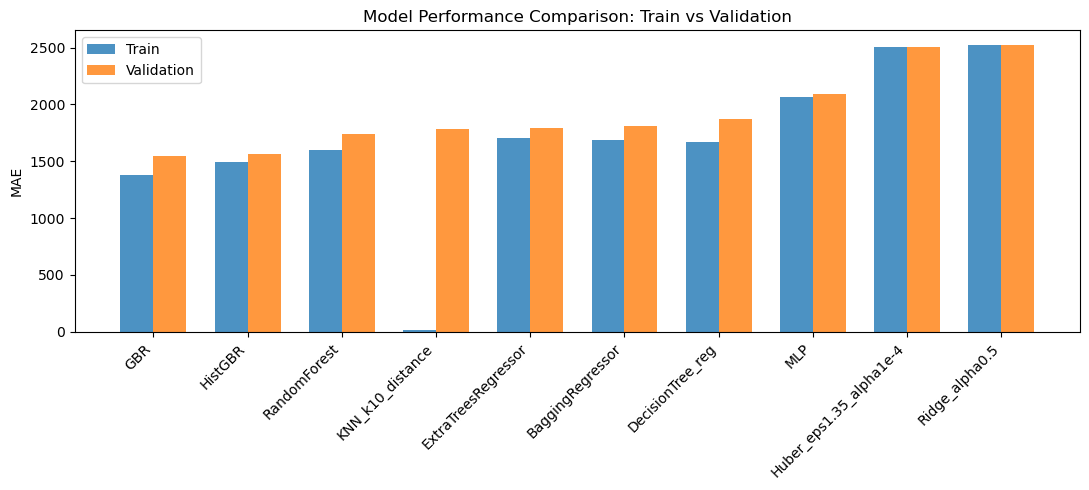

In [71]:
# Sort the DataFrame by the Mean Absolute Error (MAE) on the validation set.
# This ensures the best-performing models (lowest MAE_val) are plotted first.
df_plot = results_df.sort_values("mae_val")

x = np.arange(len(df_plot))  # Define the base positions (indices) for each model on the X-axis.
width = 0.35                 # Define the width for each individual bar in the grouped chart.

plt.figure(figsize=(11, 5)) 

# Plot the bars for the Training MAE.
plt.bar(
    # Shift position to the left (by half the width) to group with validation bars.
    x - width/2,
    # Use 'mae_train' column values for the height of the bars.
    df_plot["mae_train"],
    width,
    label="Train",
    alpha=0.8 # Set transparency level.
)

# Plot the bars for the Validation MAE.
plt.bar(
    # Shift position to the right (by half the width) to group with train bars.
    x + width/2,
    # Use 'mae_val' column values for the height of the bars.
    df_plot["mae_val"],
    width,
    label="Validation",
    alpha=0.8
)

# Set the X-axis tick marks to the model names.
plt.xticks(
    x,                          # Use the numerical positions 'x' for the tick locations.
    df_plot["model"],          
    rotation=45,                
    ha="right"                  
)

plt.ylabel("MAE") 
plt.title("Model Performance Comparison: Train vs Validation")
plt.legend() 
plt.tight_layout() # Automatically adjust plot parameters to fit everything neatly (e.g., margins).
plt.show()

Keep in mind the results presented on this table might vary slightly, depending on the run. Either way the conclusions and interpretations we can extrapolate remain the same:
* 3 models clearly stand out, performance wise (Lowest MAE and highest R2): **GBR, Hist GBR and Random Forest**; Hist GBR achieves the best R2 and smallest overfit of these 3, however GBR has a lower MAE and a very high r2 as well. Random Forest underperforms the boosting ensembles but we still consider it a contender for the final model.
* **Linear models** (Huber and Ridge) **underfit**, and **KNN** displays **extreme overfit**. The single **Decision Tree underperforms the the ensembles** tested, and overfits (by 200) even after some simple prepruning to control overfit. Therefore, these models will not be further tuned, will just be kept as baselines.

It is important to note that all models were with and without log1(price) transformation, and the results revealed that MAE improved in all models, except for KNN.

Considering these results, our optimization efforts will be focused on the best 3 models tested (GBR, HistGBR and Random Forest)

**Results of the initial Benchmarking**

| **Model**      | **MAE train** | **MAE val** |  **MAE val - MAE train** | **R2 val** | **Notes** | Performance with log(price) |
|--------------------|--------------|--------------|-----------------|----------------------------|-----------------|-----------------|
| HistGBR    |  1492 | 1560 | 68 | 0.927 |Good score, and almost doesn't overfit. | Better
| GBR    |    1383 | 1543 | 160 | 0.926 | Best score but with some overfit. | Better
| Random Forest    |    1600 | 1737 | 137 | 0.8896|Good score but with some overfit. | Better
| KNN (k=10) | 20 | 1787 | 177 | 0.877 | Brutal overfit | Worse
| Extra Trees Regressor | 1701 | 1791 | 90 | 0.887| Good score, with small overtfit.|Better
| Bagging Regressor | 1690 | 1808 | 118 | 0.8883 | Worse that RF, but with less overfit (small difference)| Better
| Decision Tree | 1669 | 1874 | 208 | 0.878 | Good score but with some overfit, even with prepruning | Better
| MLP | 2065 | 2091 | 26 | 0.869 | Not the best score, might need more tunning. | Better
| Huber | 2504 | 2505 | 1 | 0.820 | Underfit | Better
| Ridge | 2524 | 2525 | 1 | 0.819 | Underfit | Better

<a id="3"></a>

# **6. Model Optimization**

The models we chose to optimize are tree based ensembles: HistGBR, GBR and Random Forest. For the search of the best feature selection method and hyperparameters (for these models), we will proceed with no scaler, as scaling doesn't affect their performance.

However, we use log tranformations in the variables showcasing strong skewness, to help center the distributions and compress long tails, and additionally we winsorize the extreme values in `tax`, `mileage`, `mileage_per_year`, `engine_per_litre_efficiency` and `mpg` (in the quantile 99,2%), to mitigate the effects of statistical outliers in our model.

## 6.1. Feature selection strategy

To determine which feature selection strategy is the most suitable for our 3 best performing models, we compared the following options:
* **No feature seletion**: to understand whether Feature selection has a significant impact on the model performance;
* Filter method - **SelectKBest** (mutual information): with k=19, 23 and 26, to test a wide enough range of values for the number of selected variables. It ranks each feature by its mutual information with the target and keeps the best k features.
* **RFE with DT**: with k=23, the middle ground for the range of k considered in SelectKBest.
* **Select from model with RF**: defines the variables to keep according to a treshold of "median", which means that we keep the variables with importance (based on impurity) above the median.


In [72]:
models_core = [
    ("GBR_base", GradientBoostingRegressor(
            random_state=42,
            learning_rate=0.05,
            max_depth=8,      
    )),

    ("RF_base", RandomForestRegressor(
            n_estimators=300,
            max_depth=15,
            min_samples_split = 40,
            min_samples_leaf = 20,
            random_state=42,
            n_jobs=-1
    )),

    ("HistGBR_base", HistGradientBoostingRegressor(
                    random_state=42,
                    learning_rate=0.05,
                    max_iter=300,
                    max_depth=8,
    ))
]

fs_strategies = {
    "Without Feature selection": None,

    "kbest_19": SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=19),
    "kbest_23": SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=23),
    "kbest_26": SelectKBest(score_func=lambda X, y: mutual_info_regression(X, y, random_state=42), k=26),

    "rfe_DT_23": RFE(
        estimator=DecisionTreeRegressor(
                    max_depth=8,
                    min_samples_leaf=20,
                    random_state=42),
        n_features_to_select=23,
        step=0.2
    ),

    "rf_sfm": SelectFromModel(
         RandomForestRegressor(
             n_estimators=200,
             max_depth=10,
             random_state=42,
             n_jobs=-1
         ),
         threshold="median"
    ),
}

results_fs = []
for model_name, model in models_core:
  for fs_name, selector in fs_strategies.items():
      print(f"\n=== {model_name} + {fs_name} ===")

      summary, sel_freq = avg_scores(
            kf,
            X_train_val, y_train_val,
            model= model,
            scaler=None,
            fill_method='median',
            selector=selector,
            fe_freq_cols=('model',),
            ohe_cols=('fuelType', 'transmission', 'Brand'),
            use_log_target=True,
            clip_cols=('mileage','tax', 'mpg', 'mileage_per_year', 'engine_per_litre_efficiency'),
            clip_quantile=0.992
      )

      mae_tr = summary.loc["MAE", "Train"]
      mae_va = summary.loc["MAE", "Validation"]
      adjr2_tr = summary.loc["Adj_R2", "Train"]
      adjr2_va = summary.loc["Adj_R2", "Validation"]

      results_fs.append({
            "model": model_name,
            "fs_strategy": fs_name,
            "mae_train": mae_tr,
            "mae_val": mae_va,
            "gap": mae_va - mae_tr,
            "adjr2_train": adjr2_tr,
            "adjr2_val": adjr2_va
        })


=== GBR_base + Without Feature selection ===
Nº features after preprocessing: 29
Without feature selection (selector=None).

=== Metrics (Mean K-Fold) ===
            Train  Validation
Adj_R2     0.9513      0.9273
MAE     1375.4651   1536.1248
R2         0.9513      0.9274
RMSE    2148.3074   2619.7197

MAE Validation (mean ± std): 1536.1 ± 26.4

=== GBR_base + kbest_19 ===
Nº features after preprocessing: 29
Nº features after feature selection: 19

=== Metrics (Mean K-Fold) ===
            Train  Validation
Adj_R2     0.9497      0.9258
MAE     1399.7080   1561.2508
R2         0.9497      0.9258
RMSE    2183.2268   2648.0356

MAE Validation (mean ± std): 1561.3 ± 23.6

=== Feature Selection frequency (proportion of folds) ===
tax                            1.0
mpg                            1.0
engineSize                     1.0
car_age                        1.0
mileage_per_year               1.0
is_high_end                    1.0
engine_per_litre_efficiency    1.0
model_freq      

In [73]:
fs_df = (
    pd.DataFrame(results_fs)
    .sort_values(["model","mae_val"])
    .reset_index(drop=True)
)
display(fs_df)

model                fs_strategy    mae_train      mae_val  \
0       GBR_base  Without Feature selection  1375.465131  1536.124798   
1       GBR_base                   kbest_26  1382.774801  1541.683176   
2       GBR_base                   kbest_23  1382.739795  1542.630124   
3       GBR_base                  rfe_DT_23  1382.727935  1542.806597   
4       GBR_base                   kbest_19  1399.708023  1561.250808   
5       GBR_base                     rf_sfm  1403.148347  1564.286505   
6   HistGBR_base  Without Feature selection  1484.853556  1553.050170   
7   HistGBR_base                  rfe_DT_23  1487.313618  1554.363637   
8   HistGBR_base                   kbest_23  1492.441324  1560.932828   
9   HistGBR_base                   kbest_26  1494.872284  1562.692333   
10  HistGBR_base                   kbest_19  1505.109372  1572.708003   
11  HistGBR_base                     rf_sfm  1512.693121  1580.388936   
12       RF_base  Without Feature selection  1597.212064  1736.824399   
13       RF_base                   kbest_26  1598.818145  1736.834681   
14       RF_base                   kbest_23  1599.975023  1736.942230   
15       RF_base                  rfe_DT_23  1600.858851  1737.244370   
16       RF_base                   kbest_19  1611.089475  1749.338381   
17       RF_base                     rf_sfm  1615.964626  1752.198556   

           gap  adjr2_train  adjr2_val  
0   160.659668     0.951285   0.927307  
1   158.908375     0.950046   0.926408  
2   159.890329     0.950202   0.926175  
3   160.078662     0.950814   0.927104  
4   161.542785     0.949703   0.925787  
5   161.138157     0.949287   0.925024  
6    68.196614     0.937874   0.927298  
7    67.050019     0.937426   0.927768  
8    68.491504     0.936752   0.926826  
9    67.820049     0.936625   0.926697  
10   67.598632     0.936564   0.927101  
11   67.695816     0.935144   0.925571  
12  139.612335     0.905926   0.889540  
13  138.016536     0.905810   0.889560  
14  136.967207     0.905726   0.889535  
15  136.385518     0.905644   0.889546  
16  138.248906     0.904921   0.888663  
17  136.233930     0.904316   0.888124

The following points summarize the conclusions we can draw from these tests:
* GBR achieves the best MAE in validation with **no feature selection** (1536 vs 1541 with SelectKBest); however the figure showcases a very small difference between this strategy and selectKBest with k=26 and k=23. 
* for the HistGBR (with the baseline parameters and no scaler), using no feature selection leads to the best MAE. The gap in MAE between using no scaler and **SelectKBest with k=23** (the second best option) is around 8 pounds, which represents not even 1% increase.
* the Random Forest reports very similar performance when using no feature selection, SelectKBest with k=26 and SelectKBest with k=23. Therefore we will proceed with the one leading to the smallest overfit - **SelectKBest with k=23**.

We should take these results with a grain of salt - overall, feature selection has only a modest impact on performance: for all three models the spread in validation MAE across strategies is around 1–2%.

In conclusion, we will move forward using **SelectKbest with k=23 for the 3 models**, as it shows to be robust, minimizing complexity and potentially reducing overfit.

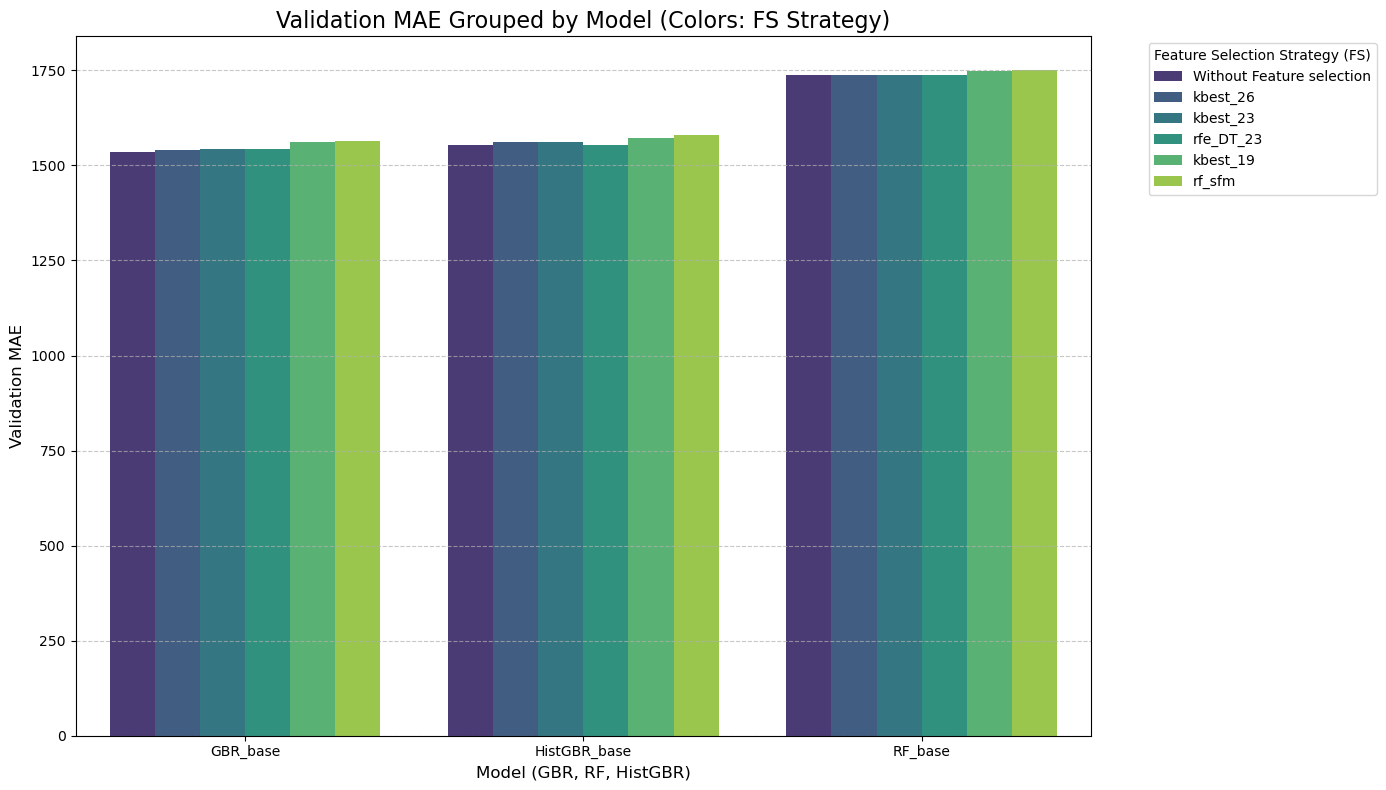

In [74]:
plt.figure(figsize=(14, 8))
sns.barplot(
    data=fs_df, 
    x='model', 
    y='mae_val', 
    hue='fs_strategy', 
    palette='viridis' 
)

plt.title('Validation MAE Grouped by Model (Colors: FS Strategy)', fontsize=16)
plt.xlabel('Model (GBR, RF, HistGBR)', fontsize=12)
plt.ylabel('Validation MAE', fontsize=12)
plt.xticks(rotation=0) 
plt.legend(title='Feature Selection Strategy (FS)', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 6.2. Random search

We opted for Random Search, as a method to find the best combination of hiperparameters that would maximize the performance of each model, as it provides a **good trade-off between performance and computational feasibility**. To ensure fair comparison and reproducibility, we fixed the cross-validation splits and used the same number of iterations in the 3 searches conducted (25 iterations). 

In [75]:
def sample_params(space):
    params = {}
    for name, values in space.items():
        if isinstance(values, tuple):
            low, high = values # for continuous intervals
            params[name] = float(np.random.uniform(low, high))
        elif isinstance(values, list): # for lists with specific values (or integers)
            params[name] = random.choice(values)
        else:
            raise ValueError(f"Invalid space for {name}")
    return params

# selector to use in HistGBR and Random Forest (determined in 6.1.)
base_selector= SelectKBest(score_func=mutual_info_regression, k=23)

# k-fold instance used previously with 3 folds
base_kf = kf

# function used to display the best combination of parameters found
def to_int_or_none(x):
    return None if pd.isna(x) else int(x)

### 6.2.1. HistGBR

To optimize this model, we set the baseline for comparison: Hist GBR with the initial parameters, no scaler and SelectKBest with k=26 (determined in 6.1. Feature selection optimization). All other preprocessing steps are the same used in 5.2. Benchmark, where we defined the common pipeline for preprocessing.

In [76]:
# same parameters we used in 5.2. Models_to_try "HistGBR",
# but using the most appropriate feature selection technique
baseline_hgb = HistGradientBoostingRegressor(
    random_state=42,
    learning_rate=0.05,
    max_iter=300,
    max_depth=8,
)

summary_hgb_base, _ = avg_scores(
    base_kf, X_train_val, y_train_val,
    model=baseline_hgb,
    scaler=None,
    fill_method='median',
    selector=base_selector,
    fe_freq_cols=('model',),
    ohe_cols=('fuelType','transmission', 'Brand'),
    use_log_target=True,
    clip_cols=('mileage','tax', 'mpg', 'mileage_per_year', 'engine_per_litre_efficiency'),
    clip_quantile=0.992
)

baseline_mae_val = summary_hgb_base.loc["MAE", "Validation"]
print("\nBaseline MAE (validation):", baseline_mae_val)


Nº features after preprocessing: 29
Nº features after feature selection: 23

=== Metrics (Mean K-Fold) ===
            Train  Validation
Adj_R2     0.9366      0.9266
MAE     1496.2337   1564.3952
R2         0.9366      0.9267
RMSE    2451.4907   2635.6565

MAE Validation (mean ± std): 1564.4 ± 23.6

=== Feature Selection frequency (proportion of folds) ===
tax                            1.00
mpg                            1.00
engineSize                     1.00
car_age                        1.00
mileage_per_year               1.00
is_high_end                    1.00
engine_per_litre_efficiency    1.00
model_freq                     1.00
fuelType_diesel                1.00
fuelType_petrol                1.00
transmission_automatic         1.00
transmission_manual            1.00
transmission_semi-automatic    1.00
Brand_audi                     1.00
Brand_bmw                      1.00
Brand_ford                     1.00
Brand_mercedes                 1.00
Brand_opel                  

Defining the hyperparameter search space, and a function that defines a random combination of them, that will be called in each iteration (each iteration will use a random combination of hyperparameters defined in the search space).

In [77]:
# fixing seeds for random search
np.random.seed(42)
random.seed(42)

# Hyperparameter space for HistGradientBoostingRegressor
param_space_hgb = {
    "loss": ['squared_error', 'absolute_error'],
    "learning_rate": (0.05, 0.2),          # continuous
    "max_depth": [6, 8, 10, 12],
    "max_iter": [200, 350, 500, 1000, 1200],            # number of iterations
    "min_samples_leaf": [25, 35, 40, 50],       # regularization
    "l2_regularization": (0.1, 1.0),        # Continuous
    "max_leaf_nodes": [None, 31, 63, 127],   # max number of leafs
    "max_features": [0.8, 1.0]
}

n_iter = 25
search_results = []

for i in range(n_iter):
    params = sample_params(param_space_hgb)

    print(f"\n>>> Iteration {i+1}/{n_iter}")
    print("Params:", params)

    model = HistGradientBoostingRegressor(
        random_state=42,
        **params
    )

    summary, _ = avg_scores(
        base_kf,
        X_train_val, y_train_val,
        model=model,
        scaler=None,
        fill_method='median',
        selector=base_selector,
        fe_freq_cols=('model',),
        ohe_cols=('fuelType','transmission', 'Brand'),
        use_log_target=True,
        clip_cols=('mileage', 'tax', 'mpg', 'mileage_per_year', 'engine_per_litre_efficiency'),
        clip_quantile=0.992
    )

    mae_train = summary.loc["MAE", "Train"]
    mae_val   = summary.loc["MAE", "Validation"]
    r2_train  = summary.loc["R2", "Train"]
    r2_val    = summary.loc["R2", "Validation"]

    search_results.append({
        "iter": i,
        **params,
        "mae_train": mae_train,
        "mae_val": mae_val,
        "gap": mae_val - mae_train,
        "r2_train": r2_train,
        "r2_val": r2_val
    })

# will print the summary of each iteration, beacuse of avg_scores function; we will summarize the results
# in search_results (the top 10 configurations of parameters out of the 25 tried)


>>> Iteration 1/25
Params: {'loss': 'squared_error', 'learning_rate': 0.10618101782710439, 'max_depth': 6, 'max_iter': 500, 'min_samples_leaf': 35, 'l2_regularization': 0.9556428757689246, 'max_leaf_nodes': 31, 'max_features': 0.8}
Nº features after preprocessing: 29
Nº features after feature selection: 23

=== Metrics (Mean K-Fold) ===
            Train  Validation
Adj_R2     0.9544      0.9407
MAE     1266.8829   1389.9654
R2         0.9545      0.9408
RMSE    2077.7464   2368.8490

MAE Validation (mean ± std): 1390.0 ± 6.1

=== Feature Selection frequency (proportion of folds) ===
tax                            1.00
mpg                            1.00
engineSize                     1.00
car_age                        1.00
mileage_per_year               1.00
is_high_end                    1.00
engine_per_litre_efficiency    1.00
model_freq                     1.00
fuelType_diesel                1.00
fuelType_petrol                1.00
transmission_automatic         1.00
transmission

In [78]:
search_df = pd.DataFrame(search_results).sort_values("mae_val").reset_index(drop=True)

print("\n=== Top 10 configurations by validation MAE ===")
display(search_df.head(10))

best_row_hgb = search_df.iloc[0]

best_params = {
    "learning_rate":     float(best_row_hgb["learning_rate"]),
    "max_depth":         to_int_or_none(best_row_hgb["max_depth"]),
    "max_iter":          int(best_row_hgb["max_iter"]),
    "min_samples_leaf":  int(best_row_hgb["min_samples_leaf"]),
    "l2_regularization": float(best_row_hgb["l2_regularization"]),
    "max_leaf_nodes":    to_int_or_none(best_row_hgb["max_leaf_nodes"]),
}

print("\n Best configuration found:")
print(best_params)
print("MAE train:", best_row_hgb["mae_train"])
print("MAE val:  ", best_row_hgb["mae_val"])
print("Baseline MAE val:", baseline_mae_val)


=== Top 10 configurations by validation MAE ===


iter            loss  learning_rate  max_depth  max_iter  min_samples_leaf  \
0     3   squared_error       0.099837         12      1200                40   
1    18   squared_error       0.197181         10       500                25   
2    14   squared_error       0.142442         10       350                35   
3     5   squared_error       0.089075          6      1000                25   
4    17  absolute_error       0.108129         12      1200                50   
5     9  absolute_error       0.110190         12       500                35   
6    24  absolute_error       0.132266          8      1200                35   
7    11  absolute_error       0.183207         12       500                35   
8     8   squared_error       0.177457         10       200                35   
9     7  absolute_error       0.110506         10      1200                35   

   l2_regularization  max_leaf_nodes  max_features    mae_train      mae_val  \
0           0.826955             NaN           0.8  1023.100242  1330.484845   
1           0.234291            63.0           1.0  1058.397689  1336.060106   
2           0.427931            63.0           1.0  1117.292886  1338.930599   
3           0.178238            63.0           1.0  1150.225650  1343.057729   
4           0.896823            63.0           0.8  1101.451904  1346.410974   
5           0.110323            63.0           1.0  1126.416837  1352.143036   
6           0.465806            63.0           1.0  1133.967362  1353.204629   
7           0.698397            63.0           0.8  1074.002641  1353.570538   
8           0.601432             NaN           1.0  1085.159404  1353.888123   
9           0.512780             NaN           0.8  1078.454067  1359.512415   

          gap  r2_train    r2_val  
0  307.384603  0.969948  0.944280  
1  277.662417  0.968518  0.944660  
2  221.637714  0.964669  0.944264  
3  192.832079  0.962818  0.943270  
4  244.959070  0.951269  0.936024  
5  225.726200  0.952356  0.937905  
6  219.237267  0.952943  0.938789  
7  279.567897  0.955478  0.937706  
8  268.728720  0.966776  0.942019  
9  281.058348  0.953982  0.936441


 Best configuration found:
{'learning_rate': 0.09983748094262426, 'max_depth': 12, 'max_iter': 1200, 'min_samples_leaf': 40, 'l2_regularization': 0.8269548390038398, 'max_leaf_nodes': None}
MAE train: 1023.1002423622595
MAE val:   1330.4848453503737
Baseline MAE val: 1564.3951818055318


The table presented below showcases the best 10 iterations out of the 25 tested. The top HistGBR configurations are very close in validation MAE (1335–1339 GBP), meaning they are effectively tied in predictive accuracy under CV. In this situation, we prioritize generalization stability over marginal MAE improvements. We selected **configuration 3** (iteration 14), which achieves a validation MAE of 1338.9 GBP (on average only 3–4 GBP worse than the best) while showing a noticeably smaller train–validation gap (MAE gap 221.6 GBP and R² drop around 2.0%). The first two configurations provide slightly lower MAE but exhibit larger generalization gaps, suggesting a higher risk of overfitting for such a small improvement in accuracy.

Relative to the baseline HistGBR (validation MAE ≈ 1562 GBP), the chosen tuned model improves performance by approximately 223 GBP, which is not ground breaking, but still a meaningful gain. 

**Chosen combination of parameters:**

("loss": "squared_error",
"learning_rate": 142442,
"max_depth": 10,
"max_iter": 350,
"min_samples_leaf": 35,
"l2_regularization": 0.427931,
"max_leaf_nodes": 63.0,
"max_features": 1.0)

### 6.2.2. GBR

To optimize this model, we set the baseline for comparison: GBR with the initial parameters, no scaler and feature selection using SelectKBest with k=23 (determined in 6.1. Feature selection optimization). All other preprocessing steps are the same used in 5.2. Benchmark, where we defined the common pipeline for preprocessing.

In [79]:
# same parameters we used in 5.2. Models_to_try "GBR"
baseline_gbr = GradientBoostingRegressor(
            random_state=42,
            learning_rate=0.05,
            max_depth=8,
        )

summary_gb_base, _ = avg_scores(
    base_kf, X_train_val, y_train_val,
    model=baseline_gbr,
    scaler=None,
    fill_method='median',
    selector= base_selector,
    fe_freq_cols=('model',),
    ohe_cols=('fuelType','transmission','Brand'),
    use_log_target=True,
    clip_cols=('mileage','tax', 'mpg', 'mileage_per_year', 'engine_per_litre_efficiency'),
    clip_quantile=0.992
)

print("\n=== Baseline GradientBoostingRegressor ===")
print(summary_gb_base)

baseline_mae_val_gb = summary_gb_base.loc["MAE", "Validation"]
print("\nBaseline MAE (validation):", baseline_mae_val_gb)

Nº features after preprocessing: 29
Nº features after feature selection: 23

=== Metrics (Mean K-Fold) ===
            Train  Validation
Adj_R2     0.9502      0.9265
MAE     1385.6682   1543.6752
R2         0.9503      0.9266
RMSE    2171.6405   2634.3835

MAE Validation (mean ± std): 1543.7 ± 23.0

=== Feature Selection frequency (proportion of folds) ===
tax                            1.00
mpg                            1.00
engineSize                     1.00
car_age                        1.00
mileage_per_year               1.00
is_high_end                    1.00
engine_per_litre_efficiency    1.00
model_freq                     1.00
fuelType_diesel                1.00
fuelType_petrol                1.00
transmission_automatic         1.00
transmission_manual            1.00
transmission_semi-automatic    1.00
Brand_audi                     1.00
Brand_bmw                      1.00
Brand_ford                     1.00
Brand_hyundai                  1.00
Brand_mercedes              

In [ ]:
# fixing seeds for random search
np.random.seed(42)
random.seed(42)

# Hyperparameter space for GradientBoostingRegressor
param_space_gbr = {
    "loss": ["squared_error", "quantile"],
    "learning_rate": (0.05, 0.15),          # continuous
    "max_depth": [4, 6, 8, 10],
    "n_estimators": [100, 300, 500, 800, 1000],
    "min_samples_leaf": [ 20, 30 ,50],
    "min_samples_split": [30, 40, 60],
    "max_leaf_nodes": [None, 31, 63, 127],   # maximum number of leaves
    "subsample": [0.85, 1.0],
    "max_features": [0.8, 1.0]
}

In [81]:
n_iter = 25
search_results_gbr = []

for i in range(n_iter):
    params = sample_params(param_space_gbr)

    print(f"\n>>> Iteration {i+1}/{n_iter}")
    print("Params:", params)

    model = GradientBoostingRegressor(
        random_state=42,
        **params
    )

    summary_gbr, _ = avg_scores(
        base_kf,
        X_train_val, y_train_val,
        model=model,
        scaler=None,
        fill_method='median',
        selector=None,
        fe_freq_cols=('model',),
        ohe_cols=('fuelType','transmission','Brand'),
        use_log_target=True,
        clip_cols=('mileage', 'tax', 'mpg'),
        clip_quantile=0.992
    )

    mae_train = summary_gbr.loc["MAE", "Train"]
    mae_val   = summary_gbr.loc["MAE", "Validation"]
    r2_train  = summary_gbr.loc["R2", "Train"]
    r2_val    = summary_gbr.loc["R2", "Validation"]

    search_results_gbr.append({
        "iter": i,
        **params,
        "mae_train": mae_train,
        "mae_val": mae_val,
        "gap": mae_val - mae_train,
        "r2_train": r2_train,
        "r2_val": r2_val
    })



>>> Iteration 1/25
Params: {'loss': 'squared_error', 'learning_rate': 0.08745401188473625, 'max_depth': 4, 'n_estimators': 500, 'min_samples_leaf': 20, 'min_samples_split': 30, 'max_leaf_nodes': 31, 'subsample': 0.85, 'max_features': 0.8}
Nº features after preprocessing: 29
Without feature selection (selector=None).

=== Metrics (Mean K-Fold) ===
            Train  Validation
Adj_R2     0.9390      0.9288
MAE     1487.1138   1557.0762
R2         0.9390      0.9289
RMSE    2404.4439   2595.1293

MAE Validation (mean ± std): 1557.1 ± 24.8

>>> Iteration 2/25
Params: {'loss': 'quantile', 'learning_rate': 0.1450714306409916, 'max_depth': 4, 'n_estimators': 100, 'min_samples_leaf': 20, 'min_samples_split': 30, 'max_leaf_nodes': 31, 'subsample': 0.85, 'max_features': 0.8}
Nº features after preprocessing: 29
Without feature selection (selector=None).

=== Metrics (Mean K-Fold) ===
            Train  Validation
Adj_R2     0.7823      0.7740
MAE     3246.5277   3287.9800
R2         0.7824     

In [82]:
search_df = pd.DataFrame(search_results_gbr).sort_values("mae_val").reset_index(drop=True)

print("\n=== Top 10 configurations by validation MAE ===")
display(search_df.head(10))

best_row_gbr = search_df.iloc[0]

print("MAE train:", best_row_gbr["mae_train"])
print("MAE val:  ", best_row_gbr["mae_val"])


=== Top 10 configurations by validation MAE ===


iter           loss  learning_rate  max_depth  n_estimators  \
0    13  squared_error       0.071234         10          1000   
1    12  squared_error       0.133244          6          1000   
2    11  squared_error       0.146991          6          1000   
3     4  squared_error       0.065602          8           500   
4     6  squared_error       0.055808          6           500   
5     8  squared_error       0.110112          6           300   
6    14  squared_error       0.068182          4          1000   
7    17  squared_error       0.102476          4           500   
8     0  squared_error       0.087454          4           500   
9     9  squared_error       0.120807          6           100   

   min_samples_leaf  min_samples_split  max_leaf_nodes  subsample  \
0                20                 40           127.0       1.00   
1                30                 30             NaN       0.85   
2                50                 40           127.0       1.00   
3                50                 40             NaN       1.00   
4                20                 30             NaN       1.00   
5                30                 40            63.0       0.85   
6                30                 60            63.0       0.85   
7                30                 30             NaN       0.85   
8                20                 30            31.0       0.85   
9                30                 40            63.0       0.85   

   max_features    mae_train      mae_val         gap  r2_train    r2_val  
0           1.0   858.909318  1291.972419  433.063101  0.979425  0.947297  
1           0.8  1056.909052  1326.397469  269.488417  0.969465  0.946056  
2           1.0  1089.317629  1331.622406  242.304777  0.967192  0.945605  
3           0.8  1207.843680  1376.501413  168.657733  0.957935  0.940282  
4           1.0  1295.853768  1429.206637  133.352868  0.953264  0.937684  
5           1.0  1323.587158  1446.198282  122.611125  0.950862  0.935831  
6           1.0  1408.435281  1492.257589   83.822308  0.945149  0.934635  
7           0.8  1467.798685  1538.666550   70.867866  0.939948  0.930503  
8           0.8  1487.113767  1557.076188   69.962421  0.939015  0.928903  
9           0.8  1540.024075  1616.828072   76.803997  0.932188  0.920966

MAE train: 858.9093182833481
MAE val:   1291.9724188793853


The random search improved GBR performance substantially: the best configuration reduced validation MAE from the baseline (1544 GBP, approximately) to 1292 GBP. However, this best-MAE configuration also shows the largest generalization gap among the top candidates (train MAE 859 vs validation MAE 1292, gap 433 GBP; R² drops from 0.979 to 0.947, a 3.2% difference), indicating stronger overfitting.

**We therefore selected the second-best configuration** as a better trade-off between accuracy and generalization. It achieves a validation MAE of 1326 GBP (on average only 34 GBP worse than the best), while reducing the train–validation MAE gap to 270 GBP and the R² gap to 2.35%.

The third configuration is slightly more stable again (smaller gaps) but with marginally higher MAE, so we kept the second configuration as the main compromise.

**Chosen combination of parameters:**

("loss": "squared_error",
"learning_rate": 0.133244,
"max_depht": 6,
"n_estimators": 1000,
"min_samples_leaf": 30,
"min_samples_split": 30,
"max_leaf_nodes": NaN,
"subsample": 0.85,
"max_features": 0.8
)

### 6.2.3. Random Forest

In [83]:
# same parameters we used in 5.2. Models_to_try "Random Forest"
baseline_rf = RandomForestRegressor(
            n_estimators=300,
            max_depth=15,
            min_samples_split = 40,
            min_samples_leaf = 20,
            random_state=42,
            n_jobs=-1
        )

summary_rf_base, _ = avg_scores(
    base_kf, X_train_val, y_train_val,
    model=baseline_rf,
    scaler=None,
    fill_method='median',
    selector=base_selector,
    fe_freq_cols=('model',),
    ohe_cols=('fuelType','transmission', 'Brand'),
    use_log_target=True,
    clip_cols=('mileage','tax', 'mpg', 'mileage_per_year', 'engine_per_litre_efficiency'),
    clip_quantile=0.992
)

print("\n=== Baseline Random Forest ===")
print(summary_rf_base)

baseline_mae_val_rf = summary_rf_base.loc["MAE", "Validation"]
print("\nBaseline MAE (validation):", baseline_mae_val_rf)

Nº features after preprocessing: 29
Nº features after feature selection: 23

=== Metrics (Mean K-Fold) ===
            Train  Validation
Adj_R2     0.9057      0.8895
MAE     1599.7233   1736.8911
R2         0.9058      0.8896
RMSE    2987.9103   3231.5893

MAE Validation (mean ± std): 1736.9 ± 27.4

=== Feature Selection frequency (proportion of folds) ===
tax                            1.00
mpg                            1.00
engineSize                     1.00
car_age                        1.00
mileage_per_year               1.00
is_high_end                    1.00
engine_per_litre_efficiency    1.00
model_freq                     1.00
fuelType_diesel                1.00
fuelType_petrol                1.00
transmission_automatic         1.00
transmission_manual            1.00
transmission_semi-automatic    1.00
Brand_audi                     1.00
Brand_bmw                      1.00
Brand_ford                     1.00
Brand_mercedes                 1.00
Brand_opel                  

In [84]:
np.random.seed(42)
random.seed(42)

# Hyperparameter space for Random Forest
param_space_rf = {
    "max_depth": [15, 18, 20, 25],
    "n_estimators": [200, 400, 500, 800],
    "min_samples_leaf": [10, 20, 40],
    "min_samples_split": [30, 40, 60],
    "bootstrap": [True,],
    "max_samples": [None, 0.9],
    "max_features": [0.8, 1.0]
}

search_results_rf= []

for i in range(n_iter):
    params = sample_params(param_space_rf)

    print(f"\n>>> Iteration {i+1}/{n_iter}")
    print("Params:", params)

    model = RandomForestRegressor(
        random_state=42,
        **params
    )

    summary, _ = avg_scores(
        base_kf,
        X_train_val, y_train_val,
        model=model,
        scaler=None,
        fill_method='median',
        selector=None,
        fe_freq_cols=('model',),
        ohe_cols=('fuelType','transmission','Brand'),
        use_log_target=True,
        clip_cols=('mileage','tax', 'mpg'),
        clip_quantile=0.992
    )

    mae_train = summary.loc["MAE", "Train"]
    mae_val   = summary.loc["MAE", "Validation"]
    r2_train  = summary.loc["R2", "Train"]
    r2_val    = summary.loc["R2", "Validation"]

    search_results_rf.append({
        "iter": i,
        **params,
        "mae_train": mae_train,
        "mae_val": mae_val,
        "gap": mae_val - mae_train,
        "r2_train": r2_train,
        "r2_val": r2_val
    })


>>> Iteração 1/25
Params: {'max_depth': 15, 'n_estimators': 200, 'min_samples_leaf': 40, 'min_samples_split': 40, 'bootstrap': True, 'max_samples': None, 'max_features': 0.8}
Nº features after preprocessing: 29
Without feature selection (selector=None).

=== Metrics (Mean K-Fold) ===
            Train  Validation
Adj_R2     0.8860      0.8778
MAE     1794.8185   1873.8225
R2         0.8861      0.8779
RMSE    3285.9569   3399.7168

MAE Validation (mean ± std): 1873.8 ± 27.7

>>> Iteração 2/25
Params: {'max_depth': 15, 'n_estimators': 200, 'min_samples_leaf': 40, 'min_samples_split': 40, 'bootstrap': True, 'max_samples': None, 'max_features': 0.8}
Nº features after preprocessing: 29
Without feature selection (selector=None).

=== Metrics (Mean K-Fold) ===
            Train  Validation
Adj_R2     0.8860      0.8778
MAE     1794.8185   1873.8225
R2         0.8861      0.8779
RMSE    3285.9569   3399.7168

MAE Validation (mean ± std): 1873.8 ± 27.7

>>> Iteração 3/25
Params: {'max_depth':

In [85]:
search_df_rf = pd.DataFrame(search_results_rf).sort_values("mae_val").reset_index(drop=True)

print("\n=== Top 10 configurations by validation MAE ===")
display(search_df_rf.head(10))

best_row_rf = search_df_rf.iloc[0]

print("MAE train:", best_row_rf["mae_train"])
print("MAE val:  ", best_row_rf["mae_val"])


=== Top 10 configurations by validation MAE ===


iter  max_depth  n_estimators  min_samples_leaf  min_samples_split  \
0     4         20           500                10                 30   
1    24         15           400                10                 30   
2    14         20           400                10                 60   
3    11         18           200                20                 40   
4     6         15           800                10                 60   
5    20         15           200                20                 40   
6    10         18           800                20                 40   
7    17         20           200                20                 40   
8    13         20           400                10                 60   
9     5         25           200                20                 40   

   bootstrap  max_samples  max_features    mae_train      mae_val         gap  \
0       True          NaN           0.8  1397.169579  1590.404272  193.234692   
1       True          NaN           0.8  1436.367270  1612.731725  176.364455   
2       True          NaN           0.8  1546.285724  1679.592610  133.306886   
3       True          NaN           0.8  1567.434359  1703.247145  135.812786   
4       True          0.9           0.8  1585.286417  1706.287476  121.001059   
5       True          NaN           0.8  1582.967958  1713.084430  130.116471   
6       True          0.9           0.8  1585.218165  1714.386398  129.168232   
7       True          0.9           0.8  1586.700964  1715.840297  129.139333   
8       True          0.9           1.0  1584.869228  1717.331265  132.462037   
9       True          NaN           1.0  1581.683087  1726.720888  145.037801   

   r2_train    r2_val  
0  0.927340  0.907768  
1  0.925508  0.906587  
2  0.914414  0.899591  
3  0.908706  0.893964  
4  0.911125  0.897187  
5  0.908030  0.893833  
6  0.906854  0.892918  
7  0.906791  0.892796  
8  0.909416  0.893938  
9  0.906633  0.890144

MAE train: 1397.1695790924005
MAE val:   1590.4042715044973


For Random Forest, we selected configuration 1 (which corresponds to iteration 4 of this random search). It achieves the **best validation performance (MAE = 1590 GBP)** while exhibiting a moderate and acceptable generalization gap (train R² of 0.927 and validation R² of 0.908, a 2.0% difference).

Configuration 2 offers only a negligible reduction in the train–validation gap (both in MAE and R²), but its validation MAE is ~23 GBP worse, so it does not provide a meaningful trade-off. Configuration 3 reduces the apparent overfitting further, yet it incurs a substantial validation MAE increase (~89 GBP) that is not justified by the relatively small gain in generalization. Therefore, configuration 1 is the most balanced and competitive choice.

**Chosen combination of parameters:**

("max_depth": 20,
"n_estimators": 500,
"min_samples_leaf": 10,
"min_samples_split": 30,
"bootstrap": True,
"max_samples": NaN,
"max_features": 0.8)

## 6.3. Final Model and Conclusions

**Model Optimization Conclusion**

Across the three shortlisted models (GBR, HistGBR and Random Forest), we performed hyperparameter optimization using random search under a consistent evaluation protocol (K-fold cross-validation with fixed splits and seeds). We report MAE as the primary metric, since it directly measures the average absolute error in price (GBP) and is robust and interpretable for the business context. We also report R² as a complementary metric to quantify explained variance and to monitor generalization behaviour.

**Feature Selection strategy**

To keep the comparison between models fair and to reduce unnecessary complexity, we adopted a single, shared feature selection strategy for benchmarking and optimization: SelectKBest (Mutual Information) with k = 23. Although we explored alternative feature selection strategies, the observed differences in validation performance were not large enough to justify model-specific feature selection choices. In practice, switching FS strategies risks over-interpreting small metric fluctuations as meaningful improvements. Therefore, using one consistent FS setup improved the scientific coherence of the optimization phase and reduced the risk of “tuning the pipeline” rather than tuning the model.

**Final candidates**

For each model, we selected a final configuration by balancing validation MAE and an overfitting signal measured through the train–validation gap (in both MAE and R²). In cases where the best validation MAE configuration showed noticeably larger gaps, we preferred an alternative that slightly sacrificed MAE while improving stability. This produces models that are more likely to generalize to unseen data and is more defensible for deployment.

The final chosen configurations for each model are summarized below and will be used in the next section to compare candidates and select the final model.

| **Model**      | **MAE val** | **R2 val** |  **MAE val - MAE train** | **R2 val - R2 Train** | 
|--------------------|--------------|--------------|-----------------|----------------------------|
| GBR    |  1325.6 | 0.9460 | 269.6 | 2.35% |
| HistGBR    |  1338.9 | 0.9443 | 221.6 | 2.04% |
| Random Forest    |  1590.4 | 0.9078 | 193.2 | 1.96% |

**Final model selection**

We compared the three optimized candidates (GBR, HistGBR, Random Forest) using the table presented above. Since the goal is accurate price prediction in monetary units, MAE provides the most interpretable measure of model utility (average absolute error in GBP), while R² and the train–validation gaps help detect overfitting.

Overall, **GBR provides the best predictive performance** on validation data (MAE of 1325.6 GBP and R² of 0.9460). The closest competitor is HistGBR (MAE of 1338.9 GBP and R² = 0.9443), with slightly smaller generalization gaps. However, the "stability" advantage of HistGBR seems modest: the R² gap differs by only 0.31 percentage points (2.35% vs 2.04%), while GBR achieves the lowest validation MAE. Given that the primary objective is minimizing prediction error in GBP, we select GBR as the final model.

Random Forest shows the smallest generalization gaps, but its validation MAE (1590.4 GBP) and validation R² (0.9078) are substantially worse than both boosting models, so it is not competitive for the final deployment.

Therefore, **we proceed with GBR as the final model**, trained on the full training set using the selected preprocessing pipeline and tuned hyperparameters, and use it to generate predictions for the test set.

**Final model parameters:**
GradientBoostingRegressor("loss": "squared_error",
"learning_rate": 0.133244,
"max_depht": 6,
"n_estimators": 1000,
"min_samples_leaf": 30,
"min_samples_split": 30,
"max_leaf_nodes": NaN,
"subsample": 0.85,
"max_features": 0.8
)


<a id="3"></a>

# **7. Deployment & Kaggle submission**

In [86]:
mdl, sc, fills, sel, cat_modes, freq_maps, dummies, feat_names, sel_feat_names, clip_info = run_model(
    X_train_val, y_train_val,
    model=GradientBoostingRegressor(
            loss='squared_error',
            max_depth=6,
            n_estimators=1000,
            min_samples_leaf=30,
            min_samples_split=30,
            subsample=0.85,
            max_leaf_nodes=None,
            learning_rate=0.133244,
            max_features=0.8,
            random_state=42
        ),
    fill_method='median',
    selector=SelectKBest(score_func= mutual_info_regression, k=23),
    scaler= None,
    fe_freq_cols=('model',),
    ohe_cols=('fuelType','transmission','Brand'),
    use_log_target=True,
    clip_cols=('mileage', 'tax', 'mpg', 'mileage_per_year', 'engine_per_litre_efficiency'),
    clip_quantile=0.992
)

To export a csv for the kaggle submission:

In [87]:
# ids & X_test
test_ids = test['carID'].copy().values
X_test   = test.drop(columns=['carID'], errors='ignore')


y_pred = predict_on_test(
    X_test, mdl,
    scaler=sc, fill_values=fills, selector=sel,
    cat_modes=cat_modes, freq_maps=freq_maps, dummies_cols=dummies,
    feature_names=feat_names,
    use_log_target=True, clip_info=clip_info
)


id_col = 'carID'
target_col = 'price'

# sanity checks
y_pred = np.asarray(y_pred).ravel().astype(float)
assert len(y_pred) == len(test_ids), f"len preds {len(y_pred)} != len ids {len(test_ids)}"

# export
sub = pd.DataFrame({id_col: test_ids, target_col: y_pred})
output_path = '../submissions/group66_submission.csv'
sub.to_csv(output_path, index=False)
print("submission saved to:", output_path, "->", sub.shape)

submission saved to: ../submissions/group66_submission.csv -> (32567, 2)


## IV. Open-Ended Section: Deployment-like interface and model interpretability

### IV.1. Objectives and rationale

The goal of the open-ended section is to **explore how our best regression pipeline could be integrated into a realistic product workflow**, while also making its behaviour more transparent.

We focused on two complementary aspects:

1. **A lightweight pricing interface for end users**  
   We implemented a simple Streamlit application that exposes the final model as an interactive tool. A user can specify car characteristics (brand, model, age, mileage, fuel type, transmission, engine size, etc.) and obtain a suggested price. This mimics how Cars4you could embed the model in a real listing-creation flow and allows us to test the model qualitatively with new, unseen combinations of features.

2. **A deeper inspection of how the model makes predictions**  
   Because our final model is a tree-based ensemble trained within a non-trivial preprocessing pipeline (log-price, winsorization, frequency encoding, feature selection), it is not obvious which variables are actually driving the predictions, and what are the ones impacting price the most. To address this, we combined:
   - **Simple impurity-based feature importances** from the final ensemble, to obtain a global ranking of the most influential features;
   - **SHAP (SHapley Additive exPlanations)** for a more detailed view, both at the global level (which features matter most on average) and at the local level (how each feature pushes individual predictions up or down).

### IV.2. Implementation outline

For the **Streamlit interface**, we reuse the trained pipeline (model + preprocessing objects) exported as a bundle. The app takes raw user inputs, applies exactly the same preprocessing steps as in our cross-validation pipeline (cleaning, encoding, clipping, scaling and feature selection), and then calls the model to generate a price prediction. This demonstrates that the model is truly “deployment-ready”: the same code used for CV can be used to score new listings.

For the **interpretability analysis**, we proceed in two steps:

- First, we compute impurity-based feature importances (when available) on the final ensemble to identify the main drivers of price (the top 10) in a simple bar chart.
- Second, we compute SHAP values on a stratified subsample of the training data (after full preprocessing), using a `TreeExplainer` on our final tree-based model. We visualise:
  - a **SHAP summary plot**, which ranks features by their average absolute SHAP value and shows how low vs high feature values affect the predicted price;
  - and several **SHAP dependence plots** for the most important variables (e.g. car age, mileage, engine size), which reveal the shape and direction of their effects on the model’s predictions.

In the next subsection, we discuss the main patterns that emerge from these analyses and how they align with economic intuition about used-car pricing.

To export the elements of preprocessing, fitted during training, for the exploration of feature importance and set up of the interface for predictions.

In [88]:
bundle = {
    "model": mdl,
    "scaler": sc,
    "fill_values": fills,
    "selector": sel,
    "cat_modes": cat_modes,
    "freq_maps": freq_maps,
    "dummies_cols": dummies,
    "feature_names": feat_names,
    "selected_feature_names": sel_feat_names,
    "clip_info": clip_info
}

joblib.dump(bundle, "../models/car_price_bundle.joblib")

['../models/car_price_bundle.joblib']

<a id="3"></a>

# **8. Model Interpretability**

**Feature Importance:**
After selecting the final model, we analyse which variables drive the predictions. This serves two purposes: (i) sanity-checking whether the model relies on sensible signals, and (ii) improving interpretability for stakeholders.

We present two complementary views:

* 1. Impurity-based feature importances (model-built importances): these measure how much each feature contributes to reducing the loss when the model creates splits. It gives a global ranking, but can be biased toward variables with many possible split points (continuous variables) or correlated features.
* 2. SHAP values (explained in the next subsection): SHAP provides both direction and magnitude of impact on the prediction, and supports local explanations (per observation).

Impurity-based importances (1.) are used here mainly as a high-level diagnostic, while SHAP (2.) is used for deeper interpretation.


## 8.1. Feature Importances

Number of features used in the final model: 23


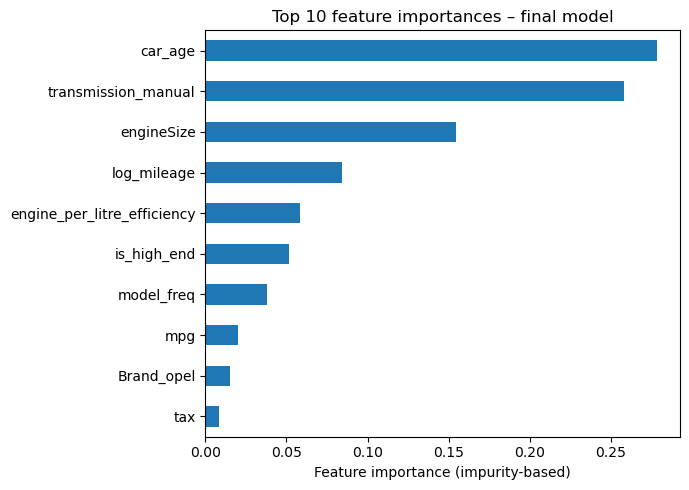

Top features according to model.feature_importances_: ['car_age', 'transmission_manual', 'engineSize', 'log_mileage', 'engine_per_litre_efficiency']


In [89]:
# 1) Retrieve the feature names used in the final model
if sel is not None and hasattr(sel, "get_support"):
    mask = sel.get_support()
    selected_feat_names = [f for f, keep in zip(feat_names, mask) if keep]
else:
    selected_feat_names = feat_names

print(f"Number of features used in the final model: {len(selected_feat_names)}")

# 2) Tree-based model feature importances (global)
importances = pd.Series(
    mdl.feature_importances_,
    index=selected_feat_names
).sort_values(ascending=False)

plt.figure(figsize=(7, 5))
importances.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 feature importances – final model")
plt.xlabel("Feature importance (impurity-based)")
plt.tight_layout()
plt.show()

top_features_from_importance = importances.head(5).index.tolist()
print("Top features according to model.feature_importances_:", top_features_from_importance)

**Impurity-based “Top 10 Feature Importances”**
The plot indicates that the model’s predictions are primarily driven by vehicle age and a small set of core technical/usage descriptors:

* `car_age` is the most important feature. This is expected: in used-car markets, depreciation is strongly related to age. The model heavily relies on this variable, suggesting it learned a realistic pricing structure (probably follows the market trend: older cars cost less).

* `transmission_manual` is the second strongest feature, indicating that transmission type creates a consistent price separation in the dataset (manual vs other, because this is a one-hot variable).

* `engineSize` is also highly influential, which aligns with intuition: engine size is a proxy for performance segment and consumption patterns, all of which correlate with price.

* `log_mileage` appears among the top features, confirming that mileage (usage intensity) matters and that the log transform helped the model capture this effect smoothly.

* Engine/efficiency-related variables (`engine_per_litre_efficiency` and `mpg`) contribute with additional information. The presence of both suggests the model captures not only performance (engineSize) but also operating-efficiency patterns that differ across cars.

* Brand/model information contributes, but is not dominant in this top-10 list: model_freq and Brand_opel appear with smaller importance. This suggests that category-level effects exist but, for this dataset, the model relies more on age/usage/engine variables for generalization.

* `tax` has low importance in the final ranking, meaning it provides limited additional predictive power.

The present visualization does not tell us whether a feature increases or decreases price, only how often and how effectively it is used in splits.

## 8.2. SHAP

In [90]:
def preprocess_data_for_shap(X_raw, bundle):
    return transform_X(
        X_raw,
        scaler=bundle["scaler"],
        fill_values=bundle["fill_values"],
        selector=bundle["selector"],
        cat_modes=bundle["cat_modes"],
        freq_maps=bundle["freq_maps"],
        dummies_cols=bundle["dummies_cols"],
        feature_names=bundle["feature_names"],
        fe_freq_cols=('Brand','model'),
        ohe_cols=('fuelType','transmission'),
        clip_info=bundle["clip_info"]
    )

In [91]:
# Sampling from the train_val datatset, so that SHAP becomes computationaly viable
X_raw_sample = X_train_val.sample(min(1000, len(X_train_val)), random_state=42)

# preprocessing sample data, with the same steps and information as the final model
X_sample = preprocess_data_for_shap(X_raw_sample, bundle)

# Build correct column names depending on whether selector reduces dimensionality
feature_names = bundle.get("feature_names")
selector = bundle.get("selector")

cols = None

if isinstance(X_sample, np.ndarray):
    n_cols = X_sample.shape[1]

    # Case 1: selector exists and supports get_support -> derive selected names
    if selector is not None and hasattr(selector, "get_support") and feature_names is not None:
        mask = selector.get_support()
        cols_candidate = [n for n, keep in zip(feature_names, mask) if bool(keep)]
        if len(cols_candidate) == n_cols:
            cols = cols_candidate

    # Case 2: no selector or mismatch -> fall back safely
    if cols is None:
        if feature_names is not None and len(feature_names) == n_cols:
            cols = feature_names
        else:
            cols = [f"f{i}" for i in range(n_cols)]

    X_sample = pd.DataFrame(X_sample, columns=cols, index=X_raw_sample.index)

print(f"SHAP sample: {len(X_sample)} observations, {X_sample.shape[1]} features.")

SHAP sample: 1000 observations, 23 features.


**SHAP Summary plot:**

This visualization provides a global explanation of the final model by **aggregating local contributions across many observations** (in our case 1000 observations, because we took a sample of the train_val dataset). Each dot corresponds to one car in the sample:

* The x-axis (SHAP value) is **the impact on the model output**: values to the right increase the predicted price; values to the left decrease it.

* The **colour encodes the feature value**: red = high, blue = low (for binary features, red typically means “1” and blue means “0”).

* Features are sorted by mean absolute SHAP value, so the **top rows are the most influential overall**.

Unlike impurity-based importance, SHAP gives both magnitude and direction, making it more reliable for interpretation.


Calculating SHAP values...


C:\Users\guilh\AppData\Local\Temp\ipykernel_16280\756196731.py:11: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


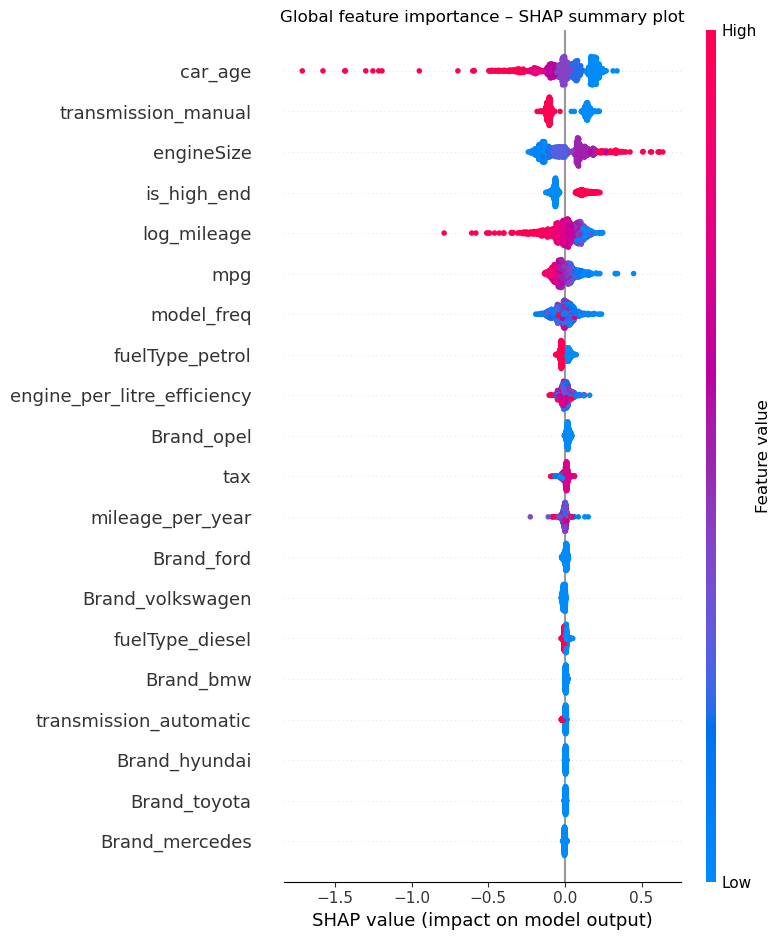

<Figure size 640x480 with 0 Axes>

In [92]:
mdl = bundle["model"]

# For HistGBR / RF / GBR: TreeExplainer
explainer = shap.TreeExplainer(mdl)

print("\nCalculating SHAP values...")
shap_values = explainer.shap_values(X_sample)

# Summary plot global
plt.figure(figsize=(12, 9))
shap.summary_plot(
    shap_values,
    X_sample,
    show=False,
    plot_type="dot"
)
plt.title("Global feature importance – SHAP summary plot")
plt.tight_layout()
plt.show()
plt.clf()

Conclusions we can draw:
* `car_age` dominates the explanation (confirms what we observed in the first plot). High values (red, older cars) are strongly associated with negative SHAP values, meaning older cars push predicted price down, while low values (blue, newer cars) push predictions up. This is consistent with depreciation and is a strong evidence that the model learned a realistic market effect.

* `transmission_manual`: The colour split indicates that when `transmission_manual` = 1 (red), the SHAP values tend to be negative, while 0 (blue) tends to be positive. In other words, manual transmission decreases predicted price relative to the baseline, while non-manual (automatic/semi-auto) increases it. This is plausible in many used-car markets, where automatic variants often command a premium.

* Higher engine sizes (red) generally appear on the positive side, indicating that larger engines increase predicted price, while smaller engines (blue) reduce it. 

* When `is_high_end` = 1 (red), the contribution is clearly positive, meaning that the high-end segment flag pushes prices upward. This supports the usefulness of this engineered feature as a proxy for premium positioning.

* Higher mileage (red) is concentrated on the negative side, so higher mileage lowers predicted price, while low mileage increases it. 

* For `mpg`, higher values tend to be associated with negative SHAP values (red leaning left), suggesting that very high `mpg` is correlated in this dataset with lower-priced vehicles, likely reflecting smaller/less powerful cars. The ratio feature (engine_per_litre_efficiency) has a smaller but coherent contribution, indicating the model uses efficiency-related signals, but they are secondary compared to age/engine/mileage.

* `model_freq`: The contributions cluster near zero with a modest spread, indicating that model popularity (frequency encoding) provides some signal, but it is not a primary driver. This is consistent with frequency encoding acting as a weak proxy rather than a direct “category effect”.

* Fuel type indicators (fuelType_petrol, fuelType_diesel): These appear with relatively small SHAP magnitudes, suggesting fuel type matters but is not a dominant determinant after controlling for age, engine size, and mileage. The tight clustering near zero also implies that fuel type effects are either weaker in this dataset or absorbed through correlated features.

* Brand dummies (`Brand_opel`, `Brand_bmw`, etc.): Most brand indicators sit close to zero in SHAP magnitude, meaning brand effects exist but are comparatively small in the final model relative to age/usage/engine/transmission. This means the model can already explain most price variation through the stronger continuous variables, and brand adds only incremental adjustments.

**Key conclusion:** Overall, SHAP confirms that the model is primarily driven by economically sensible factors (age, mileage, engine characteristics, transmission), while categorical effects (brand/fuel/model frequency) provide smaller refinements rather than dominating the predictions.

**SHAP Dependence Plots**

While the SHAP summary plot ranks features globally, **dependence plots show how the contribution of a single feature changes across its values**. Each dot is one observation: the x-axis represents the raw feature value and the y-axis (SHAP value), how much that feature pushes the prediction up (positive) or down (negative) relative to the model’s baseline.

The pattern reveals whether the relationship is linear, monotonic, threshold-based, or strongly non-linear. These plots are especially useful to validate whether the model learned relationships and make sense in this market reality.

We will plot the top-3 contributiors for the model, based on what we learned in the first plot (impurity-based feature importances).

* 1. Effect of `car_age` on price prediction: this first plot shows a clear monotonic depreciation effect (almost linear) - for very new cars (low car_age), SHAP values are positive, meaning age contributes to higher predicted prices. As car_age increases, the SHAP values steadily move downward, becoming negative. This indicates that older cars consistently reduce the predicted price, which matches real-world depreciation, as we mentioned before.

* 2. Effect of `transmission_manual` on price prediction: Because this is a binary feature, the dependence plot forms two vertical clusters - when transmission_manual = 0 (not manual), SHAP values are mostly positive; when transmission_manual = 1 (manual), SHAP values are mostly negative. The tight clustering suggests the model treats this as a fairly consistent premium/discount.

* 3. Effect of `engineSize` on price prediction: this last dependence plot shows a strong positive relationship between engine size and predicted price, where smaller engines (around 1.0–1.6L) tend to have negative or near-zero SHAP values, meaning they don’t lift the price much (and may reduce it in relation to a baseline). As engineSize increases (2.0L, 3.0L and above), SHAP values become increasingly positive, showing that larger engines push predicted prices upward. The relationship is not perfectly linear; it looks like the model learns step-like increases, which is typical for tree-based models capturing market segments (small engine economy cars vs larger engine vehicles).

Features used in the dependence plots: ['car_age', 'transmission_manual', 'engineSize']

--- SHAP dependence plot: car_age ---


<Figure size 800x600 with 0 Axes>

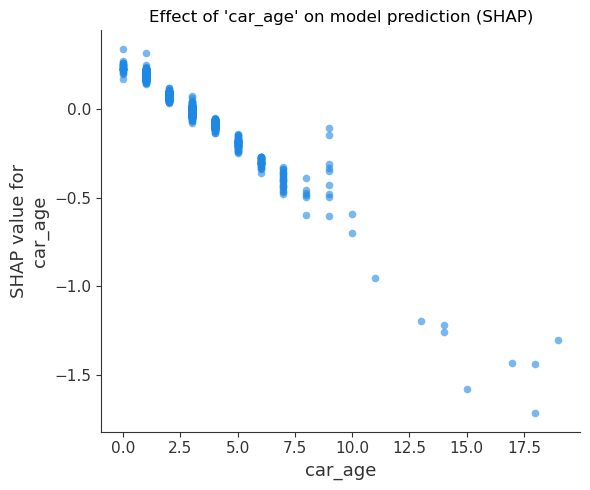


--- SHAP dependence plot: transmission_manual ---


<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

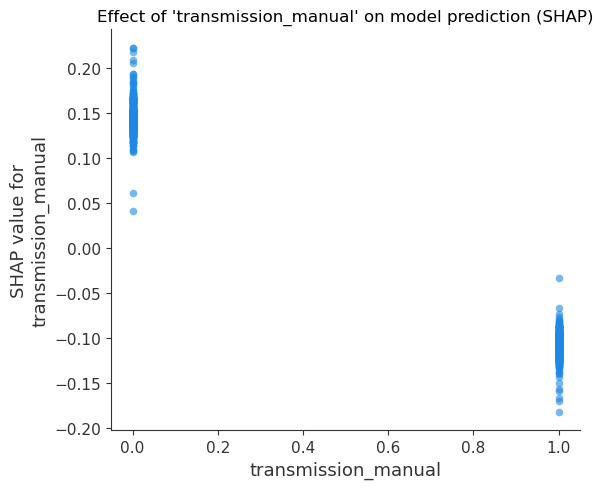


--- SHAP dependence plot: engineSize ---


<Figure size 640x480 with 0 Axes>

<Figure size 800x600 with 0 Axes>

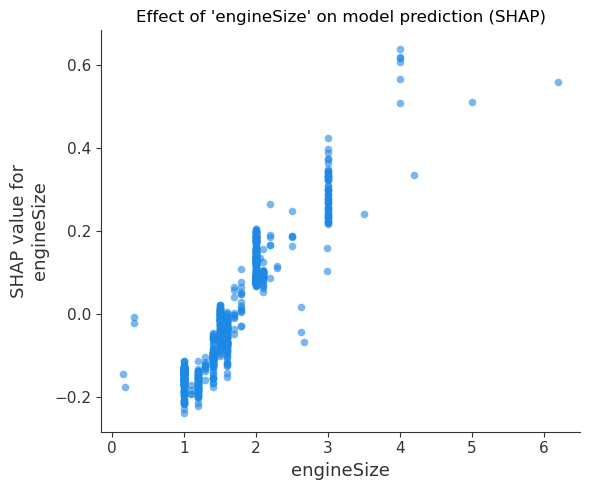

<Figure size 640x480 with 0 Axes>

In [93]:
candidate_features = top_features_from_importance  # from the first plot
top_features = [f for f in candidate_features if f in X_sample.columns][:3]

print("Features used in the dependence plots:", top_features)

for feature in top_features:
    print(f"\n--- SHAP dependence plot: {feature} ---")
    plt.figure(figsize=(8, 6))
    shap.dependence_plot(
        feature,
        shap_values,
        X_sample,
        dot_size=30,
        alpha=0.6,
        show=False,
        interaction_index=None
    )
    plt.title(f"Effect of '{feature}' on model prediction (SHAP)")
    plt.tight_layout()
    plt.show()
    plt.clf()